<a href="https://colab.research.google.com/github/saumya1007/GA-LSTM/blob/main/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
ROOT="/content/drive/MyDrive/saumya singh/study"
os.chdir(ROOT)

In [ ]:
import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# Define plant equation
def plant_eqn(y, y_prev, r, r_prev):
    return 0.72*y + 0.025*y_prev*r + 0.001*(r_prev**2) + 0.2*r_prev

# Set simulation parameters
num_steps = 1000
y = np.zeros(num_steps)
r = np.zeros(num_steps)

# Generate input-output data
for t in range(num_steps):
    r[t] = np.sin(2*np.pi*t/250)
    if t == 0:
        y[t] = plant_eqn(0, 0, r[t], 0)
    elif t == 1:
        y[t] = plant_eqn(y[t-1], 0, r[t], r[t-1])
    else:
        y[t] = plant_eqn(y[t-1], y[t-2], r[t], r[t-1])

# Print input-output data
print("Input data (r): ", r)
print("Output data (y):", y)

# Combine input and output data into a DataFrame
data1 = pd.DataFrame({'r': r, 'y': y})

# Save data to CSV file
data1.to_csv('data1.csv', index=False)


Input data (r):  [ 0.00000000e+00  2.51300954e-02  5.02443182e-02  7.53268055e-02
  1.00361715e-01  1.25333234e-01  1.50225589e-01  1.75023059e-01
  1.99709981e-01  2.24270761e-01  2.48689887e-01  2.72951936e-01
  2.97041582e-01  3.20943610e-01  3.44642923e-01  3.68124553e-01
  3.91373667e-01  4.14375581e-01  4.37115767e-01  4.59579861e-01
  4.81753674e-01  5.03623202e-01  5.25174630e-01  5.46394347e-01
  5.67268949e-01  5.87785252e-01  6.07930298e-01  6.27691361e-01
  6.47055962e-01  6.66011867e-01  6.84547106e-01  7.02649970e-01
  7.20309025e-01  7.37513117e-01  7.54251381e-01  7.70513243e-01
  7.86288432e-01  8.01566985e-01  8.16339251e-01  8.30595899e-01
  8.44327926e-01  8.57526656e-01  8.70183755e-01  8.82291226e-01
  8.93841424e-01  9.04827052e-01  9.15241173e-01  9.25077207e-01
  9.34328942e-01  9.42990536e-01  9.51056516e-01  9.58521789e-01
  9.65381639e-01  9.71631733e-01  9.77268124e-01  9.82287251e-01
  9.86685944e-01  9.90461426e-01  9.93611311e-01  9.96133609e-01
  9.9802

NameError: ignored

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Set the number of time steps
num_steps = 1000

# Generate the input and output data
r = np.sin(2*np.pi*np.arange(num_steps)/250)
y = np.zeros(num_steps)
y[0] = 0.1
for k in range(1, num_steps):
    y[k] = 0.72*y[k-1] + 0.025*y[k-2]*r[k-1] + 0.001*(r[k-1]**2) + 0.2*r[k-2]

# Combine input and output data into a DataFrame
data = pd.DataFrame({'r': r, 'y': y})

# Save data to CSV file
data.to_csv('data.csv', index=False)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from google.colab import files
uploaded = files.upload()
import io
df = pd.read_csv(io.BytesIO(uploaded['data1.csv']))

Saving data1.csv to data1 (16).csv


In [ ]:
df

,r,y
0,0.000000,0.000000
1,0.025130,0.000000
2,0.050244,0.005027
3,0.075327,0.013671
4,0.100362,0.024926
...,...,...
995,-0.125333,-0.147935
996,-0.100362,-0.131151
997,-0.075327,-0.114213
998,-0.050244,-0.097128


In [ ]:
df.head()
df.info()
y=df[["y"]]
plant_input=df[["r"]]
y.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   r       1000 non-null   float64
 1   y       1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


,y
count,1000.000000
mean,0.033688
std,0.507508
min,-0.651179
25%,-0.473548
50%,0.007912
75%,0.538353
max,0.784819


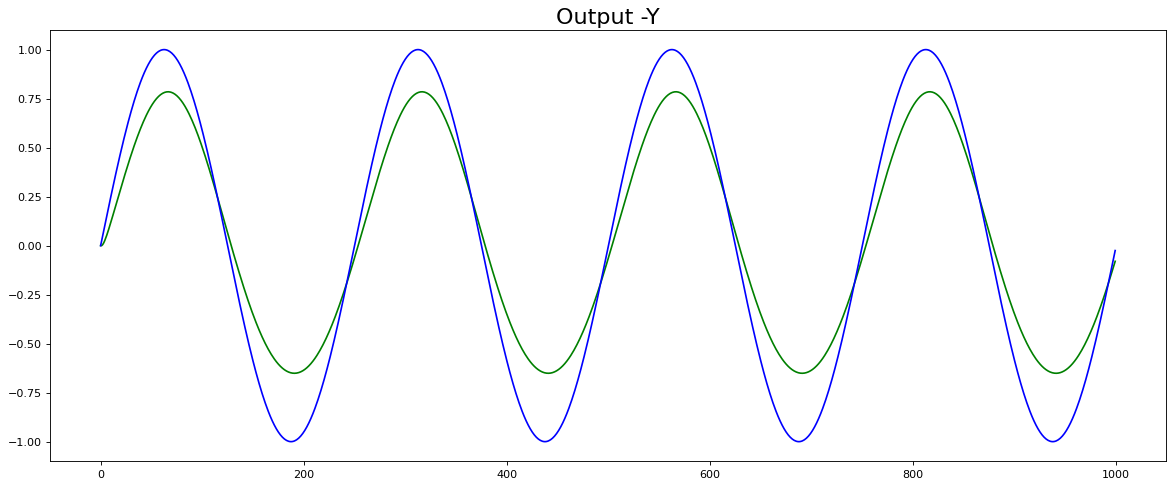

In [ ]:
plt.figure(num=1, figsize=(18, 7), dpi=80, facecolor='w', edgecolor='k')
plt.title( 'Output -Y', fontsize=20)

plt.plot(y, "g")
plt.plot(plant_input, "b")


<ipython-input-6-cad161133aed>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(plant_output, shade=True, color='dark green', linewidth=3)


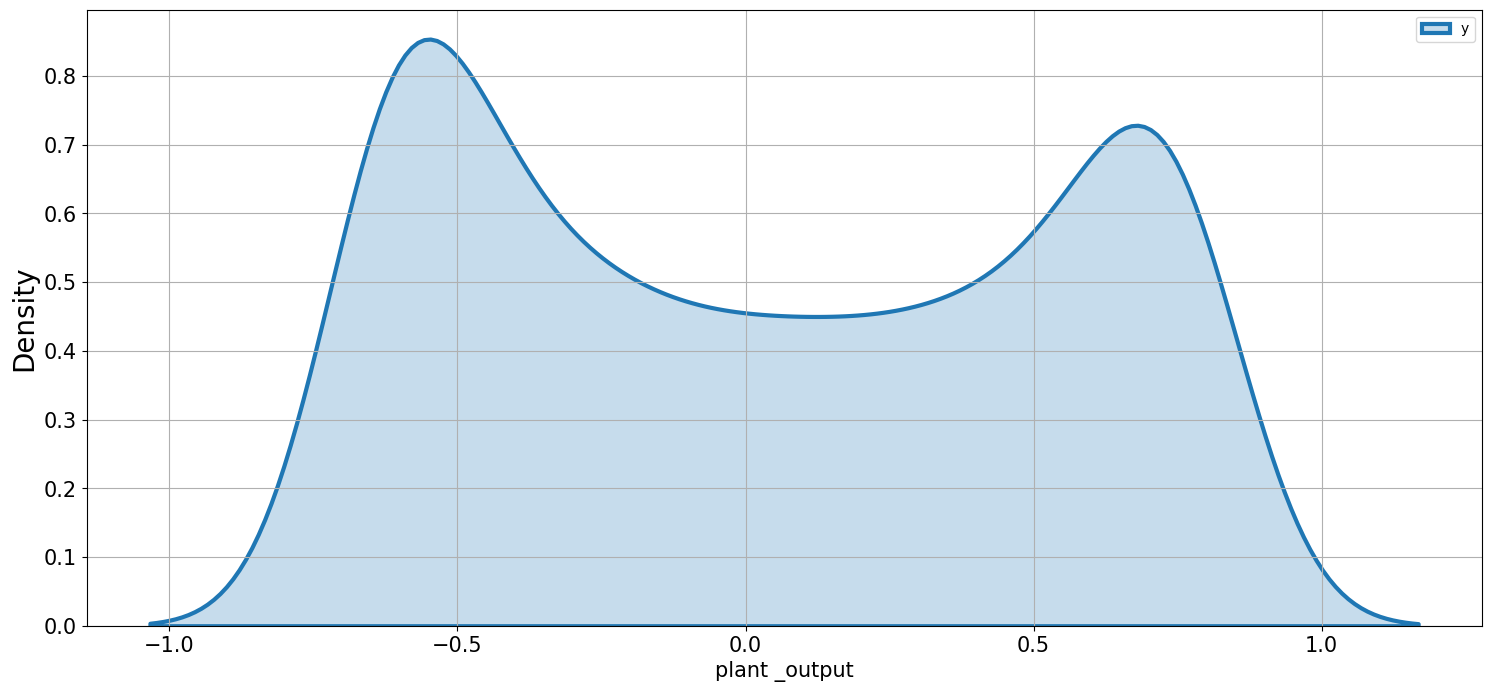

In [ ]:
# Distribution 
import seaborn as sns
import matplotlib.pyplot as plt
plant_output = y
plt.figure(figsize=(18, 8))
sns.kdeplot(plant_output, shade=True, color='dark green', linewidth=3)
plt.xlabel("plant _output", fontsize=15)
Y =  plant_output
X = plant_input
#plant_output.plot(kind='kde',figsize = (18,8), linewidth= 3) 
plt.xticks(fontsize = 15)
plt.grid("both")
plt.ylabel('Density', fontsize = 20)
plt.yticks(fontsize = 15)
plt.show()

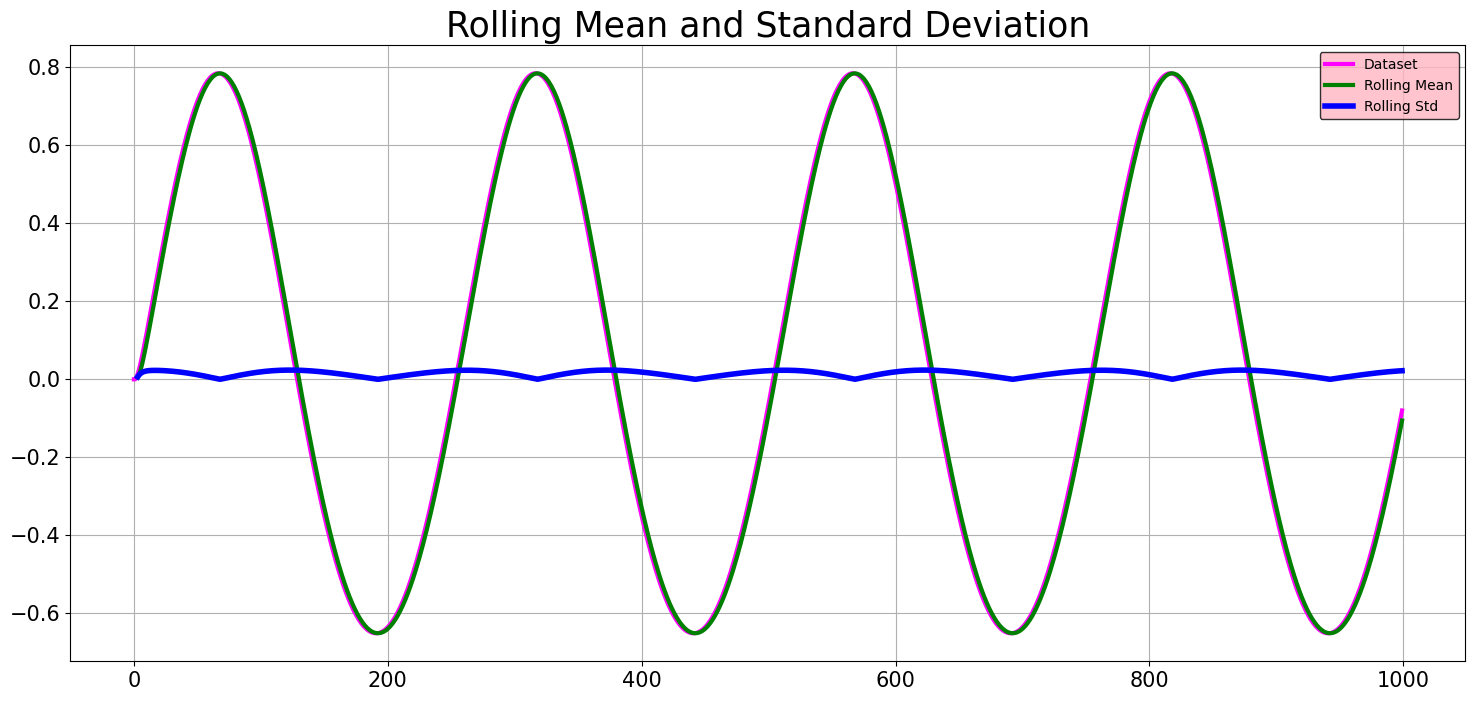

Results of dickey fuller test
Test Statistics                -67.199644
p-value                          0.000000
No. of lags used                 6.000000
Number of observations used    993.000000
critical value (1%)             -3.436953
critical value (5%)             -2.864455
critical value (10%)            -2.568322
dtype: float64


In [ ]:
import numpy as np
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    # Determing rolling statistics
    rolmean = timeseries.rolling(4).mean() # rolling mean
    rolstd = timeseries.rolling(4).std() # rolling standard deviation
    # Plot rolling statistics:
    plt.figure(figsize = (18,8))
    plt.grid('both')
    plt.plot(timeseries, color='magenta',label='Dataset', linewidth = 3)
    plt.plot(rolmean, color='green', label='Rolling Mean',linewidth = 3)
    plt.plot(rolstd, color='blue', label = 'Rolling Std',linewidth = 4)
    plt.legend(loc='best', fontsize = 10, shadow=False,facecolor='lightpink',edgecolor = 'k')
    plt.title('Rolling Mean and Standard Deviation', fontsize = 25)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.show(block=False)
    
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    # hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    
test_stationarity(plant_output)

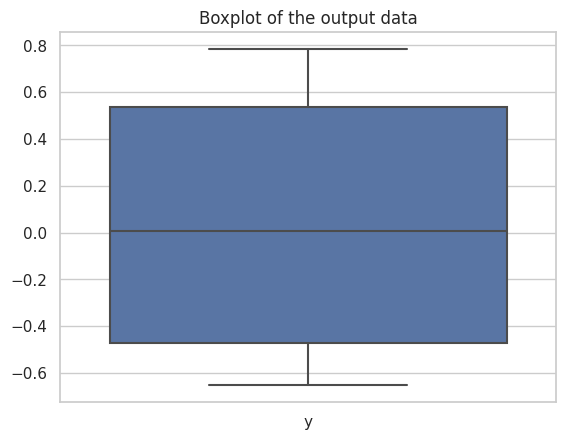

In [ ]:
import seaborn as sns 
sns.set_theme(style="whitegrid")
sns.boxplot(plant_output)
plt.title('Boxplot of the output data')
plt.show()

(800, 1) (199, 1)


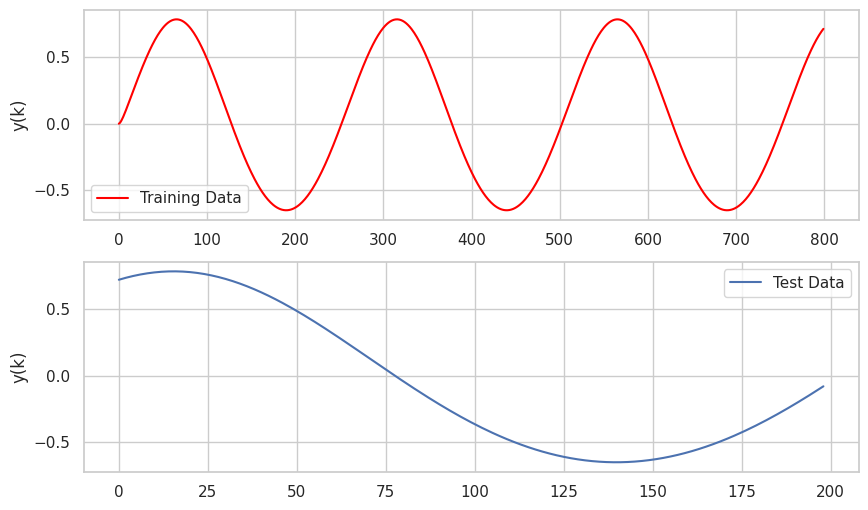

In [ ]:
from sklearn.model_selection import train_test_split

Y =  plant_output
X = plant_input
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
"""X_train=X[0:800]
X_test=X[800:1000]
Y_train=Y[0:800]
Y_test=Y[800:1000]"""
split_ratio = 0.8
split_index = int(split_ratio * len(X))
X_train, Y_train = X[:split_index], Y[1:split_index+1]
X_test, Y_test = X[split_index:-1], Y[split_index+1:]
print(X_train.shape, X_test.shape)
X_train = np.array(X_train)
X_test = np.array(X_test)
Y_train=np.array(Y_train)
Y_test=np.array(Y_test)

plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(Y_train.reshape(-1), label='Training Data',color= "red")
plt.ylabel('y(k)')
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(Y_test.reshape(-1), label='Test Data')
plt.ylabel('y(k)')
plt.legend()
plt.show()

In [ ]:
plant_output

,y
0,0.000000
1,0.000000
2,0.005027
3,0.013671
4,0.024926
...,...
995,-0.147935
996,-0.131151
997,-0.114213
998,-0.097128


In [ ]:
X_train.shape



(800, 1)

In [ ]:
Y_train.shape

(800, 1)

In [ ]:
plant_input

,r
0,0.000000
1,0.025130
2,0.050244
3,0.075327
4,0.100362
...,...
995,-0.125333
996,-0.100362
997,-0.075327
998,-0.050244


In [ ]:
X_train = X_train.reshape((X_train.shape[0], 1, 1))
X_test = X_test.reshape((X_test.shape[0], 1, 1))

In [ ]:
X_train

array([[[ 0.00000000e+00]],

       [[ 2.51300954e-02]],

       [[ 5.02443182e-02]],

       [[ 7.53268055e-02]],

       [[ 1.00361715e-01]],

       [[ 1.25333234e-01]],

       [[ 1.50225589e-01]],

       [[ 1.75023059e-01]],

       [[ 1.99709981e-01]],

       [[ 2.24270761e-01]],

       [[ 2.48689887e-01]],

       [[ 2.72951936e-01]],

       [[ 2.97041582e-01]],

       [[ 3.20943610e-01]],

       [[ 3.44642923e-01]],

       [[ 3.68124553e-01]],

       [[ 3.91373667e-01]],

       [[ 4.14375581e-01]],

       [[ 4.37115767e-01]],

       [[ 4.59579861e-01]],

       [[ 4.81753674e-01]],

       [[ 5.03623202e-01]],

       [[ 5.25174630e-01]],

       [[ 5.46394347e-01]],

       [[ 5.67268949e-01]],

       [[ 5.87785252e-01]],

       [[ 6.07930298e-01]],

       [[ 6.27691361e-01]],

       [[ 6.47055962e-01]],

       [[ 6.66011867e-01]],

       [[ 6.84547106e-01]],

       [[ 7.02649970e-01]],

       [[ 7.20309025e-01]],

       [[ 7.37513117e-01]],

       [[ 7.54

In [ ]:
Y_train = Y_train.reshape(-1,1)
Y_test = Y_test.reshape(-1,1)
Y_train


array([[ 0.        ],
       [ 0.00502665],
       [ 0.01367058],
       [ 0.02492646],
       [ 0.0380723 ],
       [ 0.05258803],
       [ 0.06809765],
       [ 0.08432811],
       [ 0.10107993],
       [ 0.11820629],
       [ 0.1355981 ],
       [ 0.15317333],
       [ 0.17086933],
       [ 0.1886374 ],
       [ 0.20643882],
       [ 0.22424207],
       [ 0.24202078],
       [ 0.25975228],
       [ 0.27741656],
       [ 0.29499552],
       [ 0.31247243],
       [ 0.32983153],
       [ 0.34705777],
       [ 0.36413659],
       [ 0.38105381],
       [ 0.39779553],
       [ 0.41434802],
       [ 0.43069775],
       [ 0.44683127],
       [ 0.46273528],
       [ 0.47839658],
       [ 0.49380206],
       [ 0.50893872],
       [ 0.5237937 ],
       [ 0.53835424],
       [ 0.55260771],
       [ 0.56654166],
       [ 0.58014379],
       [ 0.59340197],
       [ 0.60630428],
       [ 0.618839  ],
       [ 0.63099467],
       [ 0.64276004],
       [ 0.65412414],
       [ 0.66507628],
       [ 0

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense,Bidirectional
import numpy as np
from keras.optimizers import Adam
# Generate some sample data
num_samples = 100
timesteps = 1
input_dim = 1


# Define the LSTM model
model = Sequential()
model.add(LSTM(units=132, input_shape=(timesteps, input_dim), activation='tanh', recurrent_activation='sigmoid'))
model.add(Dense(units=1))

# Compile the model
model.compile(loss='mse', optimizer='Adam')

# Train the model
model.fit(X_train, Y_train, epochs=100, batch_size=132, validation_split=0.2)
mse = model.evaluate(X_test, Y_test, verbose=2)

# Return the fitness value
print('MSE: %.3f' % mse)
#print(model.layers[0].trainable_weights)


Epoch 1/100
5/5 [==============================] - 3s 137ms/step - loss: 0.2295 - val_loss: 0.1988
Epoch 2/100
5/5 [==============================] - 0s 18ms/step - loss: 0.2077 - val_loss: 0.1908
Epoch 3/100
5/5 [==============================] - 0s 20ms/step - loss: 0.1876 - val_loss: 0.1829
Epoch 4/100
5/5 [==============================] - 0s 17ms/step - loss: 0.1693 - val_loss: 0.1745
Epoch 5/100
5/5 [==============================] - 0s 17ms/step - loss: 0.1526 - val_loss: 0.1656
Epoch 6/100
5/5 [==============================] - 0s 19ms/step - loss: 0.1366 - val_loss: 0.1546
Epoch 7/100
5/5 [==============================] - 0s 14ms/step - loss: 0.1222 - val_loss: 0.1415
Epoch 8/100
5/5 [==============================] - 0s 16ms/step - loss: 0.1080 - val_loss: 0.1266
Epoch 9/100
5/5 [==============================] - 0s 13ms/step - loss: 0.0944 - val_loss: 0.1102
Epoch 10/100
5/5 [==============================] - 0s 17ms/step - loss: 0.0812 - val_loss: 0.0933
Epoch 11/100
5/5 [

7/7 [==============================] - 1s 5ms/step
RMSE : 0.02990720752187337


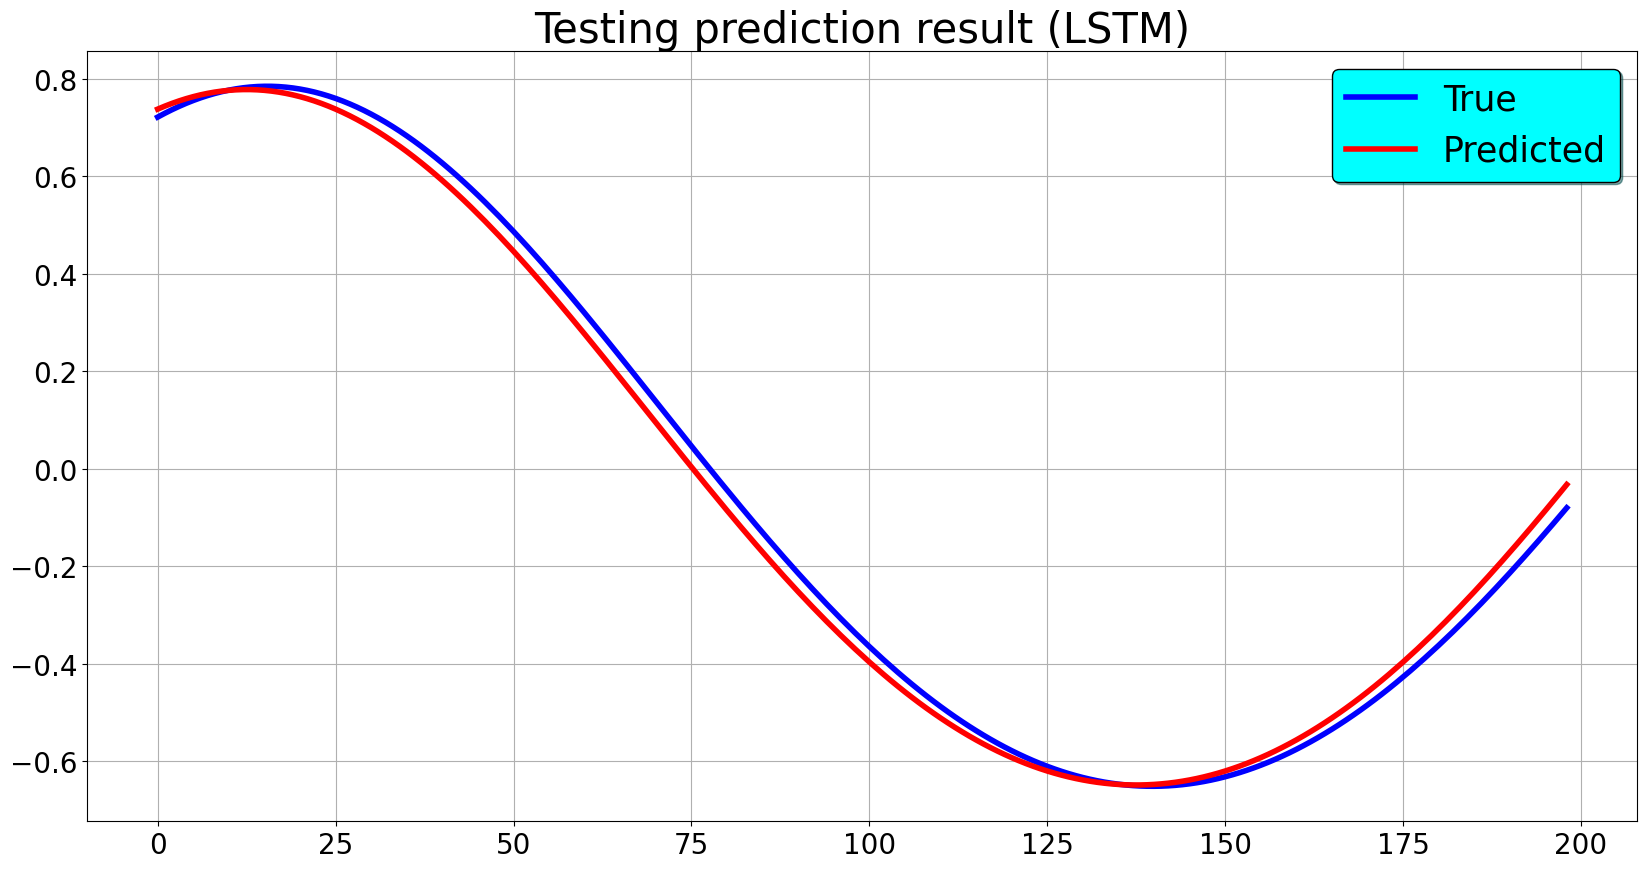

In [ ]:
test_predict_6 = model.predict(X_test)
from sklearn.metrics import mean_squared_error
print('RMSE :', np.sqrt(mean_squared_error(Y_test, test_predict_6)))
plt.figure(figsize = (20,10))
plt.grid(True, which='major', axis='both')
y_test= pd.DataFrame(Y_test)
plt.title('Testing prediction result (LSTM)', fontsize = 30)
plt.plot(y_test.index, Y_test,linewidth = 4, label='True', color = 'blue')
plt.plot(y_test.index, test_predict_6, linewidth = 4, color = 'red', label='Predicted')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(fontsize=25,shadow=True,facecolor='cyan', edgecolor = 'k')
plt.show()

In [ ]:
!pip install deap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 3.6 MB/s eta 0:00:00


In [ ]:
!pip install bitstring

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 4.8 MB/s eta 0:00:00


In [ ]:
#Add the parameters into chromosomes and define the LSTM network model
#import random
import math

def train_evaluate(ga_individual_solution):   
    # Decode GA solution to integer for num_neurons1, epochs and batch_size 
    num_neurons1_bits = BitArray(ga_individual_solution[0:9])
    num_neurons2_bits = BitArray(ga_individual_solution[9:18])
    epoch_bits = BitArray(ga_individual_solution[18:25]) 
    batch_size_bits = BitArray(ga_individual_solution[25:35])
    learning_rate_bits = BitArray(ga_individual_solution[35:])
   
    num_neurons1 = num_neurons1_bits.uint
    num_neurons2 = num_neurons2_bits.uint
    epoch = epoch_bits.uint
    Batch_size = batch_size_bits.uint
    temp = learning_rate_bits.uint
    learning_rate = temp*(math.exp(-9))
    
    print('\nNum of neurons1: ', num_neurons1,'\nNum of neurons2',num_neurons2, '\nEpoch:', epoch,'\nBatch size:',Batch_size,'\nLearning rate:',learning_rate)
    
    # Return fitness score of 100 if window_size or num_unit is zero
    if num_neurons1 < 100 or num_neurons2 < 100 or epoch < 100 or Batch_size < 500  or learning_rate < 0:
      return 0,
    
    #split into train and validation (80/20)
    split_ratio = 0.8
    split_index = int(split_ratio * len(X))
    X_train, Y_train = X[:split_index], Y[1:split_index+1]
    X_test, Y_test = X[split_index:-1], Y[split_index+1:]
    print(X_train.shape, X_test.shape)
    x_train = np.array(X_train)
    x_test = np.array(X_test)
    y_train=np.array(Y_train)
    y_test=np.array(Y_test)
    #converting the input train and test set to array format
    x_train=np.array(x_train)
    x_test=np.array(x_test)
    
    #reshape input data according to LSTM model requirements
    x_train_modified = x_train.reshape(x_train.shape[0],1,x_train.shape[1])
    x_test_modified = x_test.reshape(x_test.shape[0],1,x_test.shape[1])
    
    #Design the LSTM model
    
    optimizer=optimizers.Adam(lr=learning_rate, beta_1=0.9, beta_2=0.999, amsgrad=False)
    
    model = Sequential()
    model.add(CuDNNLSTM(num_neurons1, input_shape=(x_train_modified.shape[1],x_train_modified.shape[2]), return_sequences=True))
    model.add(Dropout(0.2))
    model.add(CuDNNLSTM(num_neurons2))
    model.add(Dropout(0.2))
    model.add(Dense(y_train.shape[1], activation='softmax'))
    model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
    model.summary()
    
    #model.fit(x_train_modified, y_train, epochs=epoch, batch_size=Batch_size)

    history=model.fit(x_train_modified, y_train, epochs=epoch, batch_size=Batch_size,verbose=0)
    y_pred = model.predict(x_test_modified)
    acc=history.history['acc']
    maxacc=round(max(acc),5)
    #rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print('Validation Accuracy : ', maxacc,'\n')
    #print('Accuracy:', max(acc))
    
    return maxacc,

In [ ]:
import numpy as np
from bitstring import BitArray
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense
from keras import optimizers



# Define the fitness function to train and evaluate the LSTM model
def train_evaluate(ga_individual_solution):
    # Decode GA solution to integer for num_neurons, epochs and batch_size
    num_neurons_bits = BitArray(ga_individual_solution[0:10])
    epoch_bits = BitArray(ga_individual_solution[10:20])
    batch_size_bits = BitArray(ga_individual_solution[20:30])
    learning_rate_bits = BitArray(ga_individual_solution[30:40])

    num_neurons = num_neurons_bits.uint + 50
    epoch = epoch_bits.uint + 10
    batch_size = batch_size_bits.uint * 10
    learning_rate = learning_rate_bits.uint * 0.0001

    print('\nNum of neurons: ', num_neurons, '\nEpoch:', epoch, '\nBatch size:', batch_size, '\nLearning rate:', learning_rate)

    # Return fitness score of 0 if any of the hyperparameters are zero
    if num_neurons == 50 or epoch == 10 or batch_size == 0 or learning_rate == 0:
        return 0,

    # Split the data into training and testing sets
    split_ratio = 0.8
    split_index = int(split_ratio * len(X))
    X_train, Y_train = X[:split_index], Y[:split_index]
    X_test, Y_test = X[split_index:], Y[split_index:]

    # Reshape the input data for LSTM model
    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1]))
    X_test = np.reshape(X_test, (X_test.shape[0],  X_test.shape[1]))

    # Define the LSTM model architecture
    model = Sequential()
    model.add(LSTM(num_neurons, input_shape=(1, X_train.shape[1])))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    optimizer = optimizers.Adam(lr=learning_rate)
    model.compile(loss='mse', optimizer=optimizer)

    # Train the model on the training data
    model.fit(X_train, Y_train, epochs=epoch, batch_size=batch_size, verbose=0)

    # Evaluate the model on the testing data
    mse = model.evaluate(X_test, Y_test, verbose=0)

    return mse,

# Define the genetic algorithm parameters
num_generations = 10
population_size = 20
gene_length = 40

# Create the initial population randomly
population = np.random.randint(2, size=(population_size, gene_length))

# Evolve the population for the specified number of generations
for i in range(num_generations):
    # Rank the individuals in the population by fitness score
    scores = [train_evaluate(individual) for individual in population]
    ranked_population = [x for _, x in sorted(zip(scores, population), key=lambda pair: pair[0], reverse=True)]

    # Select the top individuals for breeding
    elite = ranked_population[:int(population_size * 0.1)]
    parents = ranked_population[:int(population_size * 0.5)]
    num_parents = len(parents)

    # Create the next generation of individuals
    offspring = np.zeros((population_size - len(elite), gene_length), dtype=int)
   



Num of neurons:  822 
Epoch: 352 
Batch size: 2600 
Learning rate: 0.0655


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  650 
Epoch: 266 
Batch size: 5860 
Learning rate: 0.0821


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  908 
Epoch: 429 
Batch size: 1600 
Learning rate: 0.07440000000000001


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  469 
Epoch: 308 
Batch size: 5460 
Learning rate: 0.06960000000000001


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  1031 
Epoch: 343 
Batch size: 9090 
Learning rate: 0.042100000000000005


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  437 
Epoch: 61 
Batch size: 3080 
Learning rate: 0.058


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  190 
Epoch: 23 
Batch size: 3880 
Learning rate: 0.10070000000000001


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  613 
Epoch: 191 
Batch size: 750 
Learning rate: 0.060700000000000004


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  197 
Epoch: 47 
Batch size: 10070 
Learning rate: 0.0405


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  967 
Epoch: 714 
Batch size: 2680 
Learning rate: 0.0465


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  300 
Epoch: 119 
Batch size: 5860 
Learning rate: 0.0678


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  78 
Epoch: 295 
Batch size: 5190 
Learning rate: 0.0091


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  487 
Epoch: 616 
Batch size: 1270 
Learning rate: 0.0351


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  862 
Epoch: 34 
Batch size: 4180 
Learning rate: 0.0263


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  595 
Epoch: 911 
Batch size: 8020 
Learning rate: 0.0786


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  1070 
Epoch: 121 
Batch size: 9130 
Learning rate: 0.0935


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  663 
Epoch: 356 
Batch size: 8900 
Learning rate: 0.0058000000000000005


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  634 
Epoch: 98 
Batch size: 6930 
Learning rate: 0.032600000000000004


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  531 
Epoch: 708 
Batch size: 6400 
Learning rate: 0.0639


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  631 
Epoch: 485 
Batch size: 5920 
Learning rate: 0.0422


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  822 
Epoch: 352 
Batch size: 2600 
Learning rate: 0.0655


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  650 
Epoch: 266 
Batch size: 5860 
Learning rate: 0.0821


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  908 
Epoch: 429 
Batch size: 1600 
Learning rate: 0.07440000000000001


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  469 
Epoch: 308 
Batch size: 5460 
Learning rate: 0.06960000000000001


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  1031 
Epoch: 343 
Batch size: 9090 
Learning rate: 0.042100000000000005


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  437 
Epoch: 61 
Batch size: 3080 
Learning rate: 0.058


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  190 
Epoch: 23 
Batch size: 3880 
Learning rate: 0.10070000000000001


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  613 
Epoch: 191 
Batch size: 750 
Learning rate: 0.060700000000000004


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  197 
Epoch: 47 
Batch size: 10070 
Learning rate: 0.0405


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  967 
Epoch: 714 
Batch size: 2680 
Learning rate: 0.0465


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  300 
Epoch: 119 
Batch size: 5860 
Learning rate: 0.0678


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  78 
Epoch: 295 
Batch size: 5190 
Learning rate: 0.0091


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  487 
Epoch: 616 
Batch size: 1270 
Learning rate: 0.0351


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  862 
Epoch: 34 
Batch size: 4180 
Learning rate: 0.0263


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  595 
Epoch: 911 
Batch size: 8020 
Learning rate: 0.0786


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  1070 
Epoch: 121 
Batch size: 9130 
Learning rate: 0.0935


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  663 
Epoch: 356 
Batch size: 8900 
Learning rate: 0.0058000000000000005


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  634 
Epoch: 98 
Batch size: 6930 
Learning rate: 0.032600000000000004


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  531 
Epoch: 708 
Batch size: 6400 
Learning rate: 0.0639


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  631 
Epoch: 485 
Batch size: 5920 
Learning rate: 0.0422


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  822 
Epoch: 352 
Batch size: 2600 
Learning rate: 0.0655


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  650 
Epoch: 266 
Batch size: 5860 
Learning rate: 0.0821


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  908 
Epoch: 429 
Batch size: 1600 
Learning rate: 0.07440000000000001


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  469 
Epoch: 308 
Batch size: 5460 
Learning rate: 0.06960000000000001


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  1031 
Epoch: 343 
Batch size: 9090 
Learning rate: 0.042100000000000005


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  437 
Epoch: 61 
Batch size: 3080 
Learning rate: 0.058


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  190 
Epoch: 23 
Batch size: 3880 
Learning rate: 0.10070000000000001


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  613 
Epoch: 191 
Batch size: 750 
Learning rate: 0.060700000000000004


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  197 
Epoch: 47 
Batch size: 10070 
Learning rate: 0.0405


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  967 
Epoch: 714 
Batch size: 2680 
Learning rate: 0.0465


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  300 
Epoch: 119 
Batch size: 5860 
Learning rate: 0.0678


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  78 
Epoch: 295 
Batch size: 5190 
Learning rate: 0.0091


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  487 
Epoch: 616 
Batch size: 1270 
Learning rate: 0.0351


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  862 
Epoch: 34 
Batch size: 4180 
Learning rate: 0.0263


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  595 
Epoch: 911 
Batch size: 8020 
Learning rate: 0.0786


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  1070 
Epoch: 121 
Batch size: 9130 
Learning rate: 0.0935


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  663 
Epoch: 356 
Batch size: 8900 
Learning rate: 0.0058000000000000005


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  634 
Epoch: 98 
Batch size: 6930 
Learning rate: 0.032600000000000004


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  531 
Epoch: 708 
Batch size: 6400 
Learning rate: 0.0639


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  631 
Epoch: 485 
Batch size: 5920 
Learning rate: 0.0422


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  822 
Epoch: 352 
Batch size: 2600 
Learning rate: 0.0655


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  650 
Epoch: 266 
Batch size: 5860 
Learning rate: 0.0821


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  908 
Epoch: 429 
Batch size: 1600 
Learning rate: 0.07440000000000001


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  469 
Epoch: 308 
Batch size: 5460 
Learning rate: 0.06960000000000001


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  1031 
Epoch: 343 
Batch size: 9090 
Learning rate: 0.042100000000000005


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  437 
Epoch: 61 
Batch size: 3080 
Learning rate: 0.058


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  190 
Epoch: 23 
Batch size: 3880 
Learning rate: 0.10070000000000001


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  613 
Epoch: 191 
Batch size: 750 
Learning rate: 0.060700000000000004


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  197 
Epoch: 47 
Batch size: 10070 
Learning rate: 0.0405


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  967 
Epoch: 714 
Batch size: 2680 
Learning rate: 0.0465


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  300 
Epoch: 119 
Batch size: 5860 
Learning rate: 0.0678


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  78 
Epoch: 295 
Batch size: 5190 
Learning rate: 0.0091


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  487 
Epoch: 616 
Batch size: 1270 
Learning rate: 0.0351


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  862 
Epoch: 34 
Batch size: 4180 
Learning rate: 0.0263


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  595 
Epoch: 911 
Batch size: 8020 
Learning rate: 0.0786


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  1070 
Epoch: 121 
Batch size: 9130 
Learning rate: 0.0935


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  663 
Epoch: 356 
Batch size: 8900 
Learning rate: 0.0058000000000000005


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  634 
Epoch: 98 
Batch size: 6930 
Learning rate: 0.032600000000000004


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  531 
Epoch: 708 
Batch size: 6400 
Learning rate: 0.0639


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  631 
Epoch: 485 
Batch size: 5920 
Learning rate: 0.0422


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  822 
Epoch: 352 
Batch size: 2600 
Learning rate: 0.0655


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  650 
Epoch: 266 
Batch size: 5860 
Learning rate: 0.0821


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  908 
Epoch: 429 
Batch size: 1600 
Learning rate: 0.07440000000000001


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  469 
Epoch: 308 
Batch size: 5460 
Learning rate: 0.06960000000000001


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  1031 
Epoch: 343 
Batch size: 9090 
Learning rate: 0.042100000000000005


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  437 
Epoch: 61 
Batch size: 3080 
Learning rate: 0.058


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  190 
Epoch: 23 
Batch size: 3880 
Learning rate: 0.10070000000000001


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  613 
Epoch: 191 
Batch size: 750 
Learning rate: 0.060700000000000004


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  197 
Epoch: 47 
Batch size: 10070 
Learning rate: 0.0405


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  967 
Epoch: 714 
Batch size: 2680 
Learning rate: 0.0465


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  300 
Epoch: 119 
Batch size: 5860 
Learning rate: 0.0678


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  78 
Epoch: 295 
Batch size: 5190 
Learning rate: 0.0091


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  487 
Epoch: 616 
Batch size: 1270 
Learning rate: 0.0351


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  862 
Epoch: 34 
Batch size: 4180 
Learning rate: 0.0263


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  595 
Epoch: 911 
Batch size: 8020 
Learning rate: 0.0786


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  1070 
Epoch: 121 
Batch size: 9130 
Learning rate: 0.0935


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  663 
Epoch: 356 
Batch size: 8900 
Learning rate: 0.0058000000000000005


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  634 
Epoch: 98 
Batch size: 6930 
Learning rate: 0.032600000000000004


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  531 
Epoch: 708 
Batch size: 6400 
Learning rate: 0.0639


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  631 
Epoch: 485 
Batch size: 5920 
Learning rate: 0.0422


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  822 
Epoch: 352 
Batch size: 2600 
Learning rate: 0.0655


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  650 
Epoch: 266 
Batch size: 5860 
Learning rate: 0.0821


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  908 
Epoch: 429 
Batch size: 1600 
Learning rate: 0.07440000000000001


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  469 
Epoch: 308 
Batch size: 5460 
Learning rate: 0.06960000000000001


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  1031 
Epoch: 343 
Batch size: 9090 
Learning rate: 0.042100000000000005


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  437 
Epoch: 61 
Batch size: 3080 
Learning rate: 0.058


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  190 
Epoch: 23 
Batch size: 3880 
Learning rate: 0.10070000000000001


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  613 
Epoch: 191 
Batch size: 750 
Learning rate: 0.060700000000000004


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  197 
Epoch: 47 
Batch size: 10070 
Learning rate: 0.0405


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  967 
Epoch: 714 
Batch size: 2680 
Learning rate: 0.0465


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  300 
Epoch: 119 
Batch size: 5860 
Learning rate: 0.0678


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  78 
Epoch: 295 
Batch size: 5190 
Learning rate: 0.0091


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  487 
Epoch: 616 
Batch size: 1270 
Learning rate: 0.0351


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  862 
Epoch: 34 
Batch size: 4180 
Learning rate: 0.0263


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  595 
Epoch: 911 
Batch size: 8020 
Learning rate: 0.0786


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  1070 
Epoch: 121 
Batch size: 9130 
Learning rate: 0.0935


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  663 
Epoch: 356 
Batch size: 8900 
Learning rate: 0.0058000000000000005


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  634 
Epoch: 98 
Batch size: 6930 
Learning rate: 0.032600000000000004


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  531 
Epoch: 708 
Batch size: 6400 
Learning rate: 0.0639


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  631 
Epoch: 485 
Batch size: 5920 
Learning rate: 0.0422


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  822 
Epoch: 352 
Batch size: 2600 
Learning rate: 0.0655


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  650 
Epoch: 266 
Batch size: 5860 
Learning rate: 0.0821


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  908 
Epoch: 429 
Batch size: 1600 
Learning rate: 0.07440000000000001


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  469 
Epoch: 308 
Batch size: 5460 
Learning rate: 0.06960000000000001


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  1031 
Epoch: 343 
Batch size: 9090 
Learning rate: 0.042100000000000005


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  437 
Epoch: 61 
Batch size: 3080 
Learning rate: 0.058


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  190 
Epoch: 23 
Batch size: 3880 
Learning rate: 0.10070000000000001


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  613 
Epoch: 191 
Batch size: 750 
Learning rate: 0.060700000000000004


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  197 
Epoch: 47 
Batch size: 10070 
Learning rate: 0.0405


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  967 
Epoch: 714 
Batch size: 2680 
Learning rate: 0.0465


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  300 
Epoch: 119 
Batch size: 5860 
Learning rate: 0.0678


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  78 
Epoch: 295 
Batch size: 5190 
Learning rate: 0.0091


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  487 
Epoch: 616 
Batch size: 1270 
Learning rate: 0.0351


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  862 
Epoch: 34 
Batch size: 4180 
Learning rate: 0.0263


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  595 
Epoch: 911 
Batch size: 8020 
Learning rate: 0.0786


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  1070 
Epoch: 121 
Batch size: 9130 
Learning rate: 0.0935


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  663 
Epoch: 356 
Batch size: 8900 
Learning rate: 0.0058000000000000005


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  634 
Epoch: 98 
Batch size: 6930 
Learning rate: 0.032600000000000004


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  531 
Epoch: 708 
Batch size: 6400 
Learning rate: 0.0639


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  631 
Epoch: 485 
Batch size: 5920 
Learning rate: 0.0422


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  822 
Epoch: 352 
Batch size: 2600 
Learning rate: 0.0655


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  650 
Epoch: 266 
Batch size: 5860 
Learning rate: 0.0821


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  908 
Epoch: 429 
Batch size: 1600 
Learning rate: 0.07440000000000001


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  469 
Epoch: 308 
Batch size: 5460 
Learning rate: 0.06960000000000001


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  1031 
Epoch: 343 
Batch size: 9090 
Learning rate: 0.042100000000000005


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  437 
Epoch: 61 
Batch size: 3080 
Learning rate: 0.058


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  190 
Epoch: 23 
Batch size: 3880 
Learning rate: 0.10070000000000001


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  613 
Epoch: 191 
Batch size: 750 
Learning rate: 0.060700000000000004


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  197 
Epoch: 47 
Batch size: 10070 
Learning rate: 0.0405


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  967 
Epoch: 714 
Batch size: 2680 
Learning rate: 0.0465


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  300 
Epoch: 119 
Batch size: 5860 
Learning rate: 0.0678


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  78 
Epoch: 295 
Batch size: 5190 
Learning rate: 0.0091


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  487 
Epoch: 616 
Batch size: 1270 
Learning rate: 0.0351


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  862 
Epoch: 34 
Batch size: 4180 
Learning rate: 0.0263


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  595 
Epoch: 911 
Batch size: 8020 
Learning rate: 0.0786


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  1070 
Epoch: 121 
Batch size: 9130 
Learning rate: 0.0935


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  663 
Epoch: 356 
Batch size: 8900 
Learning rate: 0.0058000000000000005


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  634 
Epoch: 98 
Batch size: 6930 
Learning rate: 0.032600000000000004


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  531 
Epoch: 708 
Batch size: 6400 
Learning rate: 0.0639


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  631 
Epoch: 485 
Batch size: 5920 
Learning rate: 0.0422


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  822 
Epoch: 352 
Batch size: 2600 
Learning rate: 0.0655


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  650 
Epoch: 266 
Batch size: 5860 
Learning rate: 0.0821


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  908 
Epoch: 429 
Batch size: 1600 
Learning rate: 0.07440000000000001


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  469 
Epoch: 308 
Batch size: 5460 
Learning rate: 0.06960000000000001


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  1031 
Epoch: 343 
Batch size: 9090 
Learning rate: 0.042100000000000005


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  437 
Epoch: 61 
Batch size: 3080 
Learning rate: 0.058


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  190 
Epoch: 23 
Batch size: 3880 
Learning rate: 0.10070000000000001


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  613 
Epoch: 191 
Batch size: 750 
Learning rate: 0.060700000000000004


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  197 
Epoch: 47 
Batch size: 10070 
Learning rate: 0.0405


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  967 
Epoch: 714 
Batch size: 2680 
Learning rate: 0.0465


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  300 
Epoch: 119 
Batch size: 5860 
Learning rate: 0.0678


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  78 
Epoch: 295 
Batch size: 5190 
Learning rate: 0.0091


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  487 
Epoch: 616 
Batch size: 1270 
Learning rate: 0.0351


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  862 
Epoch: 34 
Batch size: 4180 
Learning rate: 0.0263


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  595 
Epoch: 911 
Batch size: 8020 
Learning rate: 0.0786


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  1070 
Epoch: 121 
Batch size: 9130 
Learning rate: 0.0935


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  663 
Epoch: 356 
Batch size: 8900 
Learning rate: 0.0058000000000000005


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  634 
Epoch: 98 
Batch size: 6930 
Learning rate: 0.032600000000000004


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  531 
Epoch: 708 
Batch size: 6400 
Learning rate: 0.0639


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  631 
Epoch: 485 
Batch size: 5920 
Learning rate: 0.0422


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  822 
Epoch: 352 
Batch size: 2600 
Learning rate: 0.0655


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  650 
Epoch: 266 
Batch size: 5860 
Learning rate: 0.0821


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  908 
Epoch: 429 
Batch size: 1600 
Learning rate: 0.07440000000000001


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  469 
Epoch: 308 
Batch size: 5460 
Learning rate: 0.06960000000000001


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  1031 
Epoch: 343 
Batch size: 9090 
Learning rate: 0.042100000000000005


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  437 
Epoch: 61 
Batch size: 3080 
Learning rate: 0.058


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  190 
Epoch: 23 
Batch size: 3880 
Learning rate: 0.10070000000000001


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  613 
Epoch: 191 
Batch size: 750 
Learning rate: 0.060700000000000004


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  197 
Epoch: 47 
Batch size: 10070 
Learning rate: 0.0405


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  967 
Epoch: 714 
Batch size: 2680 
Learning rate: 0.0465


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  300 
Epoch: 119 
Batch size: 5860 
Learning rate: 0.0678


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  78 
Epoch: 295 
Batch size: 5190 
Learning rate: 0.0091


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  487 
Epoch: 616 
Batch size: 1270 
Learning rate: 0.0351


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  862 
Epoch: 34 
Batch size: 4180 
Learning rate: 0.0263


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  595 
Epoch: 911 
Batch size: 8020 
Learning rate: 0.0786


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  1070 
Epoch: 121 
Batch size: 9130 
Learning rate: 0.0935


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  663 
Epoch: 356 
Batch size: 8900 
Learning rate: 0.0058000000000000005


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  634 
Epoch: 98 
Batch size: 6930 
Learning rate: 0.032600000000000004


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  531 
Epoch: 708 
Batch size: 6400 
Learning rate: 0.0639


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  631 
Epoch: 485 
Batch size: 5920 
Learning rate: 0.0422


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  822 
Epoch: 352 
Batch size: 2600 
Learning rate: 0.0655


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  650 
Epoch: 266 
Batch size: 5860 
Learning rate: 0.0821


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  908 
Epoch: 429 
Batch size: 1600 
Learning rate: 0.07440000000000001


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  469 
Epoch: 308 
Batch size: 5460 
Learning rate: 0.06960000000000001


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  1031 
Epoch: 343 
Batch size: 9090 
Learning rate: 0.042100000000000005


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  437 
Epoch: 61 
Batch size: 3080 
Learning rate: 0.058


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  190 
Epoch: 23 
Batch size: 3880 
Learning rate: 0.10070000000000001


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  613 
Epoch: 191 
Batch size: 750 
Learning rate: 0.060700000000000004


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  197 
Epoch: 47 
Batch size: 10070 
Learning rate: 0.0405


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  967 
Epoch: 714 
Batch size: 2680 
Learning rate: 0.0465


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  300 
Epoch: 119 
Batch size: 5860 
Learning rate: 0.0678


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  78 
Epoch: 295 
Batch size: 5190 
Learning rate: 0.0091


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  487 
Epoch: 616 
Batch size: 1270 
Learning rate: 0.0351


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  862 
Epoch: 34 
Batch size: 4180 
Learning rate: 0.0263


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  595 
Epoch: 911 
Batch size: 8020 
Learning rate: 0.0786


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  1070 
Epoch: 121 
Batch size: 9130 
Learning rate: 0.0935


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  663 
Epoch: 356 
Batch size: 8900 
Learning rate: 0.0058000000000000005


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  634 
Epoch: 98 
Batch size: 6930 
Learning rate: 0.032600000000000004


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  531 
Epoch: 708 
Batch size: 6400 
Learning rate: 0.0639


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  631 
Epoch: 485 
Batch size: 5920 
Learning rate: 0.0422


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Best hyperparameters:
Number of neurons: 862
Epochs: 34
Batch size: 4180
Learning rate: 0.0263


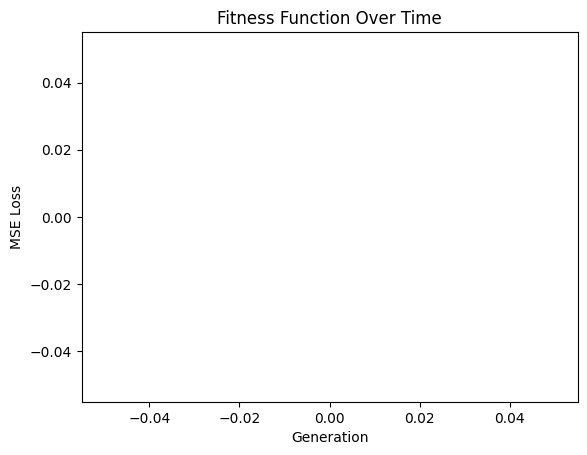

In [ ]:
# Evaluate the fitness of the final population
final_scores = [train_evaluate(individual) for individual in population]

# Find the individual with the lowest MSE loss value
best_individual = population[np.argmin(final_scores)]
best_num_neurons = BitArray(best_individual[0:10]).uint + 50
best_epoch = BitArray(best_individual[10:20]).uint + 10
best_batch_size = BitArray(best_individual[20:30]).uint * 10
best_learning_rate = BitArray(best_individual[30:40]).uint * 0.0001

# Print the best hyperparameters
print("Best hyperparameters:")
print("Number of neurons:", best_num_neurons)
print("Epochs:", best_epoch)
print("Batch size:", best_batch_size)
print("Learning rate:", best_learning_rate)

# Plot the fitness function over time
fitness_history = [max(scores) for scores in history]
plt.plot(fitness_history)
plt.title("Fitness Function Over Time")
plt.xlabel("Generation")
plt.ylabel("MSE Loss")
plt.show()


In [ ]:

history=[]

In [ ]:
# Rank the individuals in the population by fitness score
scores = [train_evaluate(individual) for individual in population]
history.append(max(scores))

ranked_population = [x for _, x in sorted(zip(scores, population), key=lambda pair: pair[0], reverse=True)]
# Plot the fitness function over time
fitness_history = [max(scores) for scores in history]
plt.plot(fitness_history)
plt.title("Fitness Function Over Time")
plt.xlabel("Generation")
plt.ylabel("MSE Loss")
plt.show()


Num of neurons:  822 
Epoch: 352 
Batch size: 2600 
Learning rate: 0.0655


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  650 
Epoch: 266 
Batch size: 5860 
Learning rate: 0.0821


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  908 
Epoch: 429 
Batch size: 1600 
Learning rate: 0.07440000000000001


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  469 
Epoch: 308 
Batch size: 5460 
Learning rate: 0.06960000000000001


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  1031 
Epoch: 343 
Batch size: 9090 
Learning rate: 0.042100000000000005


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  437 
Epoch: 61 
Batch size: 3080 
Learning rate: 0.058


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  190 
Epoch: 23 
Batch size: 3880 
Learning rate: 0.10070000000000001


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  613 
Epoch: 191 
Batch size: 750 
Learning rate: 0.060700000000000004


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  197 
Epoch: 47 
Batch size: 10070 
Learning rate: 0.0405


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  967 
Epoch: 714 
Batch size: 2680 
Learning rate: 0.0465


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  300 
Epoch: 119 
Batch size: 5860 
Learning rate: 0.0678


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  78 
Epoch: 295 
Batch size: 5190 
Learning rate: 0.0091


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  487 
Epoch: 616 
Batch size: 1270 
Learning rate: 0.0351


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  862 
Epoch: 34 
Batch size: 4180 
Learning rate: 0.0263


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  595 
Epoch: 911 
Batch size: 8020 
Learning rate: 0.0786


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  1070 
Epoch: 121 
Batch size: 9130 
Learning rate: 0.0935


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  663 
Epoch: 356 
Batch size: 8900 
Learning rate: 0.0058000000000000005


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  634 
Epoch: 98 
Batch size: 6930 
Learning rate: 0.032600000000000004


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  531 
Epoch: 708 
Batch size: 6400 
Learning rate: 0.0639


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Num of neurons:  631 
Epoch: 485 
Batch size: 5920 
Learning rate: 0.0422


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
# Obtain the best individual solution
best_individual = ranked_population[0]

# Decode the best individual solution
num_neurons_bits = BitArray(best_individual[0:10])
epoch_bits = BitArray(best_individual[10:20])
batch_size_bits = BitArray(best_individual[20:30])
learning_rate_bits = BitArray(best_individual[30:40])

num_neurons = num_neurons_bits.uint + 50
epoch = epoch_bits.uint + 10
batch_size = batch_size_bits.uint * 10
learning_rate = learning_rate_bits.uint * 0.0001

# Reshape the input data for LSTM model
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

# Define the LSTM model architecture with the best hyperparameters
model = Sequential()
model.add(LSTM(num_neurons, input_shape=(1, X_train.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1))
optimizer = optimizers.Adam(lr=learning_rate)
model.compile(loss='mse', optimizer=optimizer)

# Train the model on the training data with the best hyperparameters
model.fit(X_train, Y_train, epochs=epoch, batch_size=batch_size, verbose=0)

# Perform predictions on the testing data
predictions = model.predict(X_test)

# Print the predictions
print(predictions)


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-16-f225156cfc85>", line 16, in <cell line: 16>
    X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
NameError: name 'X_train' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/IPython/core/ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "/usr/l

In [ ]:
# Perform predictions on the test data
predicted_values = model.predict(X_test)

# Plot the predicted values against the actual values
import matplotlib.pyplot as plt

plt.plot(Y_test, label='Actual Values')
plt.plot(predicted_values, label='Predicted Values')
plt.legend()
plt.show()


#Import necessary packages

import numpy as np
import pandas as pd
from datetime import datetime
from sklearn.metrics import mean_squared_error

from deap import base, creator, tools, algorithms
from scipy.stats import bernoulli
from bitstring import BitArray
from sklearn.preprocessing import MinMaxScaler

from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import CuDNNLSTM
from keras.layers import Dense
from keras.layers import Dropout
from keras import optimizers

np.random.seed(1120)

In [ ]:
import os
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'false'


In [ ]:
population_size = 50
num_generations = 20
gene_length = 42

# As we are trying to minimize the RMSE score, that's why using -1.0. 
# In case, when you want to maximize accuracy for instance, use 1.0
creator.create('FitnessMax', base.Fitness, weights = (1.0,))
creator.create('Individual', list , fitness = creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register('binary', bernoulli.rvs, 0.5)
toolbox.register('individual', tools.initRepeat, creator.Individual, toolbox.binary, n = gene_length)
toolbox.register('population', tools.initRepeat, list , toolbox.individual)

toolbox.register('mate', tools.cxOrdered)
toolbox.register('mutate', tools.mutShuffleIndexes, indpb = 0.6)
toolbox.register('select', tools.selRoulette)
toolbox.register('evaluate', train_evaluate)

population = toolbox.population(n = population_size)
start_time = datetime.now()
print("Start time:", start_time)
r = algorithms.eaSimple(population, toolbox, cxpb = 0.4, mutpb = 0.1, ngen = num_generations, verbose = False)
end_time = datetime.now()
print('End time:',end_time)
time_elapsed = end_time-start_time
print('Time elapsed (hh:mm:ss.ms) {}'.format(time_elapsed))

In [ ]:
from keras.layers import Layer, RNN
from keras.models import Sequential, Model
from keras.layers import LSTM, Dense, Bidirectional, InputSpec, Input, RNN, Lambda, Reshape, Conv1D
from keras.optimizers import Adam
from keras.layers import TimeDistributed
import tensorflow as tf
import numpy as np
class RBM(Layer):
    def __init__(self, units, **kwargs):
        self.units = units
        super(RBM, self).__init__(**kwargs)

    def build(self, input_shape):
        self.W = self.add_weight(shape=(input_shape[-1], self.units),
                                 initializer='glorot_uniform',
                                 name='W')
        self.hb = self.add_weight(shape=(self.units,),
                                  initializer='zeros',
                                  name='hb')
        self.vb = self.add_weight(shape=(input_shape[-1],),
                                  initializer='zeros',
                                  name='vb')
        super(RBM, self).build(input_shape)

    def call(self, inputs):
        v_0 = inputs
        h_0 = tf.sigmoid(tf.matmul(v_0, self.W) + self.hb)
        v_k = tf.sigmoid(tf.matmul(h_0, tf.transpose(self.W)) + self.vb)
        h_k = tf.sigmoid(tf.matmul(v_k, self.W) + self.hb)
        return h_k

class RBMCell(RNN):
    def __init__(self, units, **kwargs):
        cell = RBM(units)
        super(RBMCell, self).__init__(cell, **kwargs)
        self.units = units

    @property
    def state_size(self):
        return (self.units,)

    @property
    def output_size(self):
        return self.units

In [ ]:

num_samples = 1000
timesteps = 1
input_dim = 1

# Define the RBM-LSTM model
model_1 = Sequential()
model_1.add(RBM(units=132, input_shape=(timesteps, input_dim)))
model_1.add(LSTM(units=132, activation='tanh', recurrent_activation='sigmoid'))
model_1.add(Dense(units=1))

adamopt = Adam(lr=0.001)
model_1.compile(optimizer = adamopt, loss = 'mse')
# Compile the model
#model_1.compile(loss='mse', optimizer='Adam')

# Train the model
model_1.fit(X_train, Y_train, epochs=100, batch_size=132, validation_split=0.2)
mse = model_1.evaluate(X_test, Y_test, verbose=2)

# Return the fitness value
print('MSE: %.3f' % mse)


Epoch 1/100
5/5 [==============================] - 3s 144ms/step - loss: 0.2575 - val_loss: 0.2447
Epoch 2/100
5/5 [==============================] - 0s 21ms/step - loss: 0.2485 - val_loss: 0.3410
Epoch 3/100
5/5 [==============================] - 0s 20ms/step - loss: 0.2470 - val_loss: 0.2523
Epoch 4/100
5/5 [==============================] - 0s 23ms/step - loss: 0.2468 - val_loss: 0.3382
Epoch 5/100
5/5 [==============================] - 0s 18ms/step - loss: 0.2516 - val_loss: 0.2870
Epoch 6/100
5/5 [==============================] - 0s 21ms/step - loss: 0.2498 - val_loss: 0.2716
Epoch 7/100
5/5 [==============================] - 0s 20ms/step - loss: 0.2466 - val_loss: 0.3290
Epoch 8/100
5/5 [==============================] - 0s 19ms/step - loss: 0.2467 - val_loss: 0.2581
Epoch 9/100
5/5 [==============================] - 0s 19ms/step - loss: 0.2445 - val_loss: 0.3211
Epoch 10/100
5/5 [==============================] - 0s 17ms/step - loss: 0.2489 - val_loss: 0.2718
Epoch 11/100
5/5 [

7/7 [==============================] - 0s 3ms/step
RMSE : 0.04193332519523038


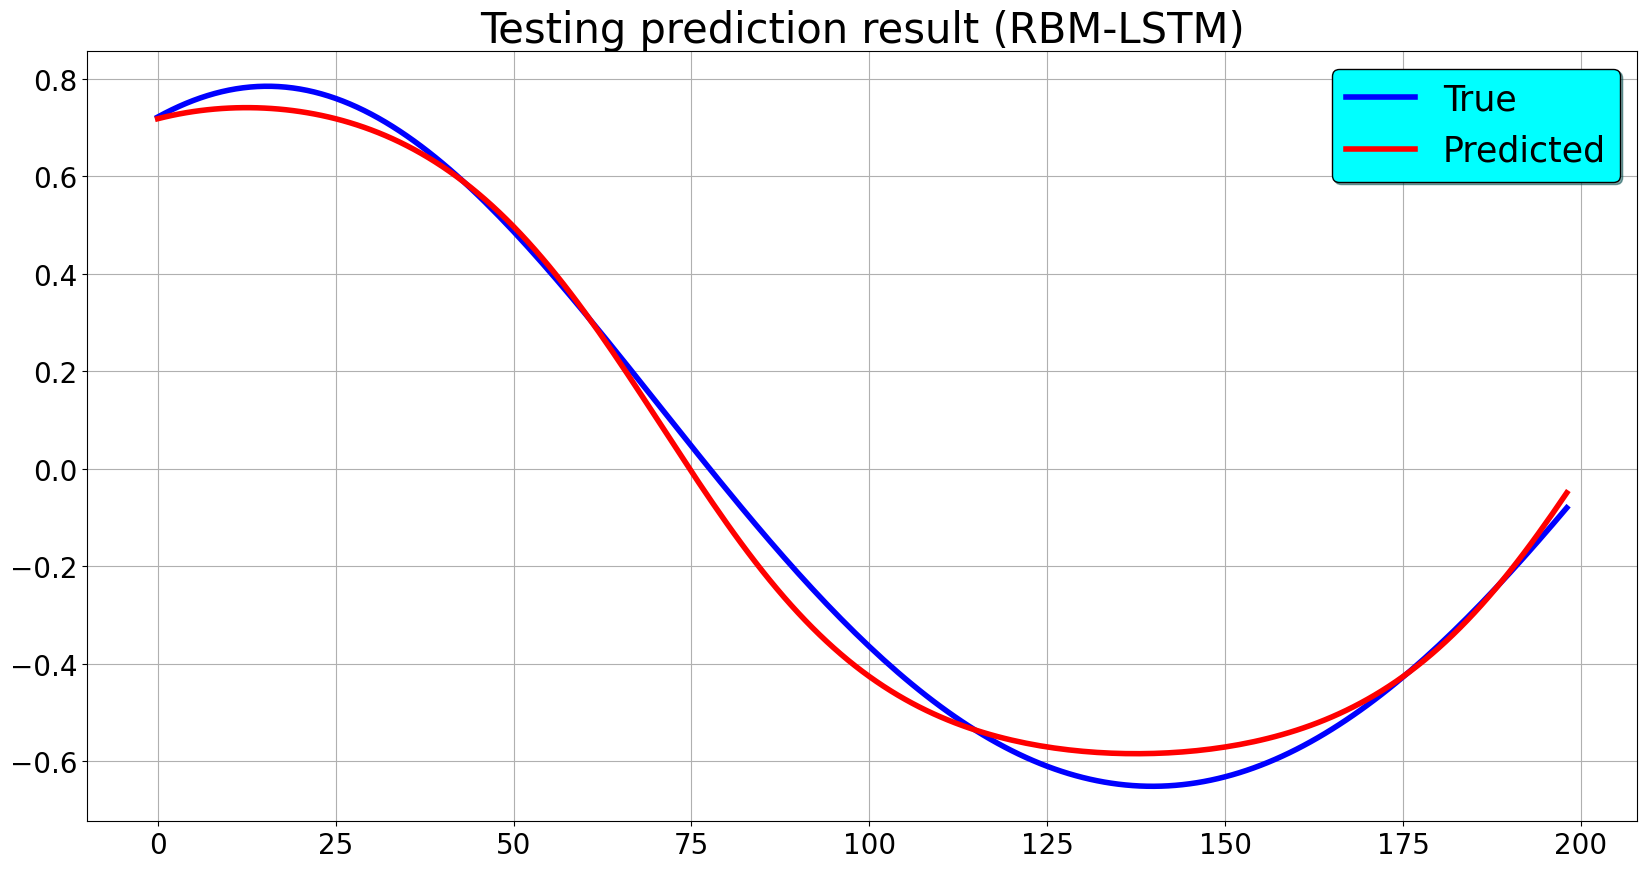

In [ ]:
test_predict_6 = model_1.predict(X_test)
from sklearn.metrics import mean_squared_error
print('RMSE :', np.sqrt(mean_squared_error(Y_test, test_predict_6)))
plt.figure(figsize = (20,10))
plt.grid(True, which='major', axis='both')
y_test= pd.DataFrame(Y_test)
plt.title('Testing prediction result (RBM-LSTM)', fontsize = 30)
plt.plot(y_test.index, Y_test,linewidth = 4, label='True', color = 'blue')
plt.plot(y_test.index, test_predict_6, linewidth = 4, color = 'red', label='Predicted')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(fontsize=25,shadow=True,facecolor='cyan', edgecolor = 'k')
plt.show()

In [ ]:
timesteps=1
input_dim=1
model_3 = Sequential()
model_3.add(LSTM(units=132, input_shape=(timesteps, input_dim), activation='tanh', recurrent_activation='sigmoid'))
model_3.add(LSTM(units= 50, return_sequences=True))
model_3.add(LSTM(50))
model_3.add(Dropout(0.2))
model_3.add(Dense(1))
model_3.compile(loss='mean_squared_error', optimizer='adam')
model_3 = Sequential()
model_3.add(LSTM(50, return_sequences= True, input_shape= (timesteps, input_dim)))
model_3.add(LSTM(50, return_sequences=True))
model.add(Dropout(0.2))
model_3.add(LSTM(50))
model_3.add(Dense(1))
model_3.compile(loss = 'mean_squared_error', optimizer = 'adam')

# Train the model
model_3.fit(X_train, Y_train, epochs=100, batch_size=132, validation_split=0.2)
mse = model_3.evaluate(X_test, Y_test, verbose=2)

# Return the fitness value
print('MSE: %.3f' % mse)


ValueError: ignored

In [ ]:
test_predict_6 = model_3.predict(X_test)
from sklearn.metrics import mean_squared_error
print('RMSE :', np.sqrt(mean_squared_error(Y_test, test_predict_6)))
plt.figure(figsize = (20,10))
plt.grid(True, which='major', axis='both')
y_test= pd.DataFrame(Y_test)
plt.title('Testing prediction result (RBM-LSTM)', fontsize = 30)
plt.plot(y_test.index, Y_test,linewidth = 4, label='True', color = 'blue')
plt.plot(y_test.index, test_predict_6, linewidth = 4, color = 'red', label='Predicted')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(fontsize=25,shadow=True,facecolor='cyan', edgecolor = 'k')
plt.show()

In [ ]:
from keras.layers import Dropout
model_4 = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model_4.add(LSTM(units = 250, return_sequences = True, input_shape = (X_train.shape[1], 1),activation='tanh'))
model_4.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model_4.add(LSTM(units = 200, return_sequences = True))
model_4.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model_4.add(LSTM(units = 150, return_sequences = True))
model_4.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model_4.add(LSTM(units = 75))
model_4.add(Dropout(0.2))
# Adding the output layer
model_4.add(Dense(units = 1))
# Compiling the RNN
adamopt = Adam(lr=0.0001)
#adagrad = Adagrad(lr=0.01)
model_4.compile(optimizer = adamopt, loss = 'mean_squared_error')
#model.compile(optimizer = adagrad, loss = 'mse',metrics= ["accuracy"])
#model_4.compile(optimizer = 'adam', loss = 'mean_squared_error')
# Train the model
model_4.fit(X_train, Y_train, epochs=100, batch_size=132, validation_split=0.2)
mse = model_4.evaluate(X_test, Y_test, verbose=2)

# Return the fitness value
print('MSE: %.3f' % mse)


Epoch 1/100


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


5/5 [==============================] - 10s 451ms/step - loss: 0.2603 - val_loss: 0.2292
Epoch 2/100
5/5 [==============================] - 0s 47ms/step - loss: 0.2596 - val_loss: 0.2298
Epoch 3/100
5/5 [==============================] - 0s 47ms/step - loss: 0.2589 - val_loss: 0.2305
Epoch 4/100
5/5 [==============================] - 0s 45ms/step - loss: 0.2581 - val_loss: 0.2311
Epoch 5/100
5/5 [==============================] - 0s 51ms/step - loss: 0.2573 - val_loss: 0.2318
Epoch 6/100
5/5 [==============================] - 0s 46ms/step - loss: 0.2564 - val_loss: 0.2324
Epoch 7/100
5/5 [==============================] - 0s 46ms/step - loss: 0.2554 - val_loss: 0.2329
Epoch 8/100
5/5 [==============================] - 0s 78ms/step - loss: 0.2542 - val_loss: 0.2334
Epoch 9/100
5/5 [==============================] - 0s 73ms/step - loss: 0.2530 - val_loss: 0.2337
Epoch 10/100
5/5 [==============================] - 0s 74ms/step - loss: 0.2512 - val_loss: 0.2340
Epoch 11/100
5/5 [===========

7/7 [==============================] - 2s 6ms/step
RMSE : 0.029069265425801485


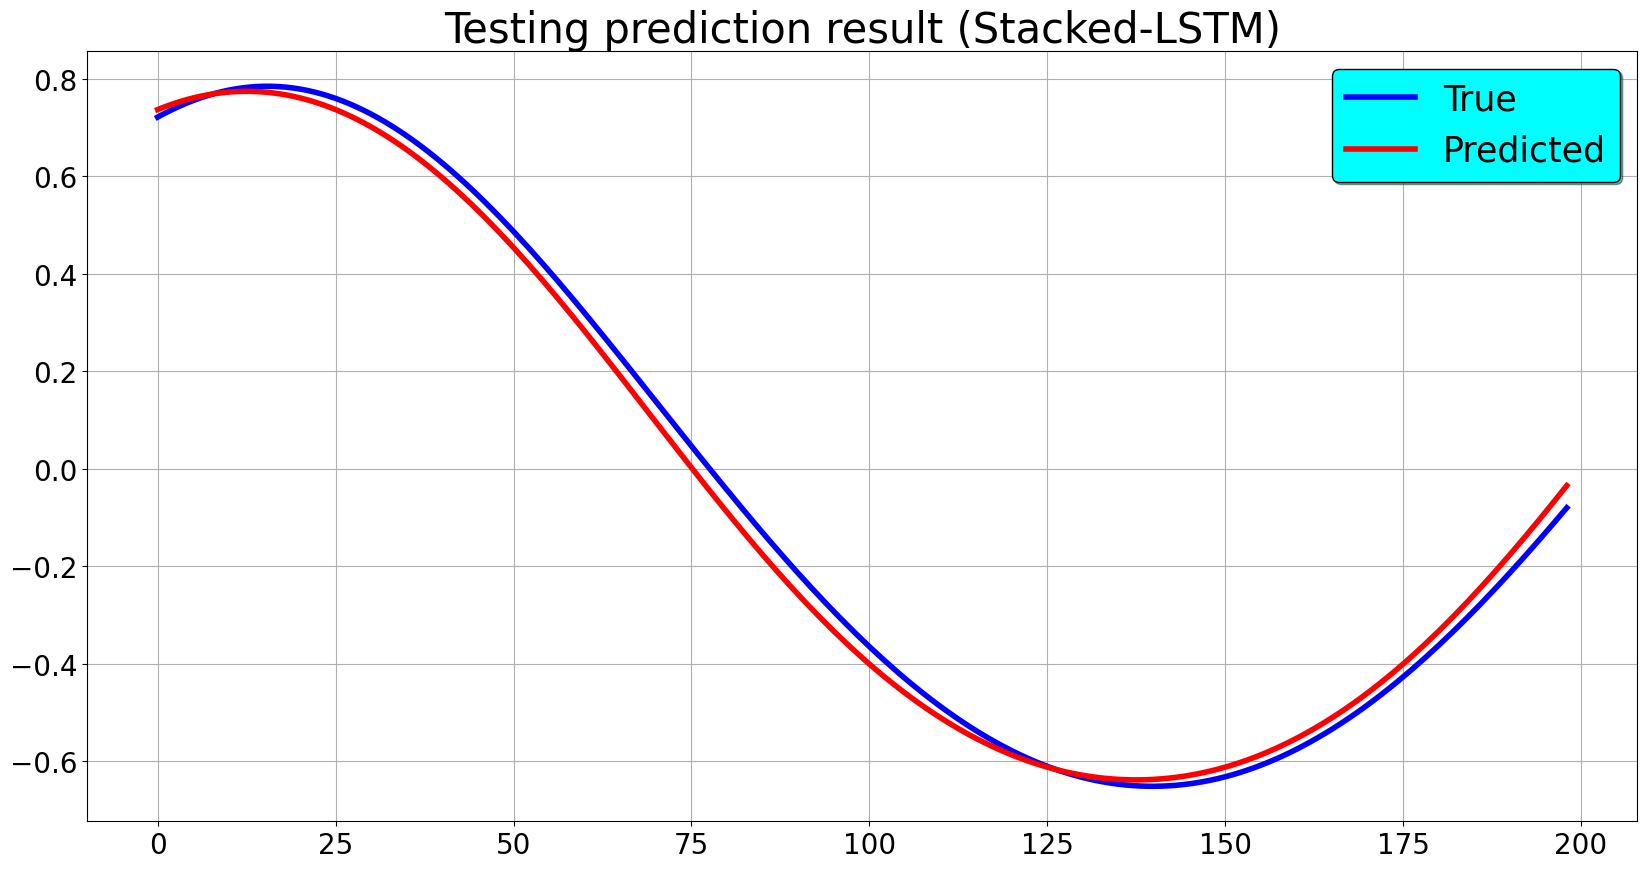

In [ ]:
test_predict_6 = model_4.predict(X_test)
from sklearn.metrics import mean_squared_error
print('RMSE :', np.sqrt(mean_squared_error(Y_test, test_predict_6)))
plt.figure(figsize = (20,10))
plt.grid(True, which='major', axis='both')
y_test= pd.DataFrame(Y_test)
plt.title('Testing prediction result (Stacked-LSTM)', fontsize = 30)
plt.plot(y_test.index, Y_test,linewidth = 4, label='True', color = 'blue')
plt.plot(y_test.index, test_predict_6, linewidth = 4, color = 'red', label='Predicted')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(fontsize=25,shadow=True,facecolor='cyan', edgecolor = 'k')
plt.show()

In [ ]:
model_3 = Sequential()
model_3.add(Bidirectional(LSTM(300, activation='relu', input_shape=(X_train[1,:].shape))))
model_3.add(Dropout(0.2))
model_3.add(Dense(1))
adamopt = Adam(lr=0.0001)
model_3.compile(optimizer = adamopt, loss = 'mse')
model_3.fit(X_train, Y_train, epochs = 100, batch_size = 100,verbose=2)
#model.compile(optimizer = adagrad, loss = 'mse',metrics= ["accuracy"])
model_3.compile(optimizer = 'adam', loss = 'mean_squared_error')
# Train the model
model_3.fit(X_train, Y_train, epochs=100, batch_size=132, validation_split=0.2)
mse = model_3.evaluate(X_test, Y_test, verbose=2)

# Return the fitness value
print('MSE: %.3f' % mse)

/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/100
8/8 - 4s - loss: 0.2520 - 4s/epoch - 471ms/step
Epoch 2/100
8/8 - 0s - loss: 0.2458 - 146ms/epoch - 18ms/step
Epoch 3/100
8/8 - 0s - loss: 0.2399 - 142ms/epoch - 18ms/step
Epoch 4/100
8/8 - 0s - loss: 0.2338 - 152ms/epoch - 19ms/step
Epoch 5/100
8/8 - 0s - loss: 0.2280 - 154ms/epoch - 19ms/step
Epoch 6/100
8/8 - 0s - loss: 0.2222 - 164ms/epoch - 21ms/step
Epoch 7/100
8/8 - 0s - loss: 0.2160 - 142ms/epoch - 18ms/step
Epoch 8/100
8/8 - 0s - loss: 0.2109 - 142ms/epoch - 18ms/step
Epoch 9/100
8/8 - 0s - loss: 0.2051 - 155ms/epoch - 19ms/step
Epoch 10/100
8/8 - 0s - loss: 0.2000 - 163ms/epoch - 20ms/step
Epoch 11/100
8/8 - 0s - loss: 0.1946 - 148ms/epoch - 18ms/step
Epoch 12/100
8/8 - 0s - loss: 0.1895 - 170ms/epoch - 21ms/step
Epoch 13/100
8/8 - 0s - loss: 0.1843 - 161ms/epoch - 20ms/step
Epoch 14/100
8/8 - 0s - loss: 0.1791 - 148ms/epoch - 18ms/step
Epoch 15/100
8/8 - 0s - loss: 0.1737 - 154ms/epoch - 19ms/step
Epoch 16/100
8/8 - 0s - loss: 0.1687 - 146ms/epoch - 18ms/step
Epo

7/7 [==============================] - 0s 7ms/step
RMSE : 0.032227405172402086


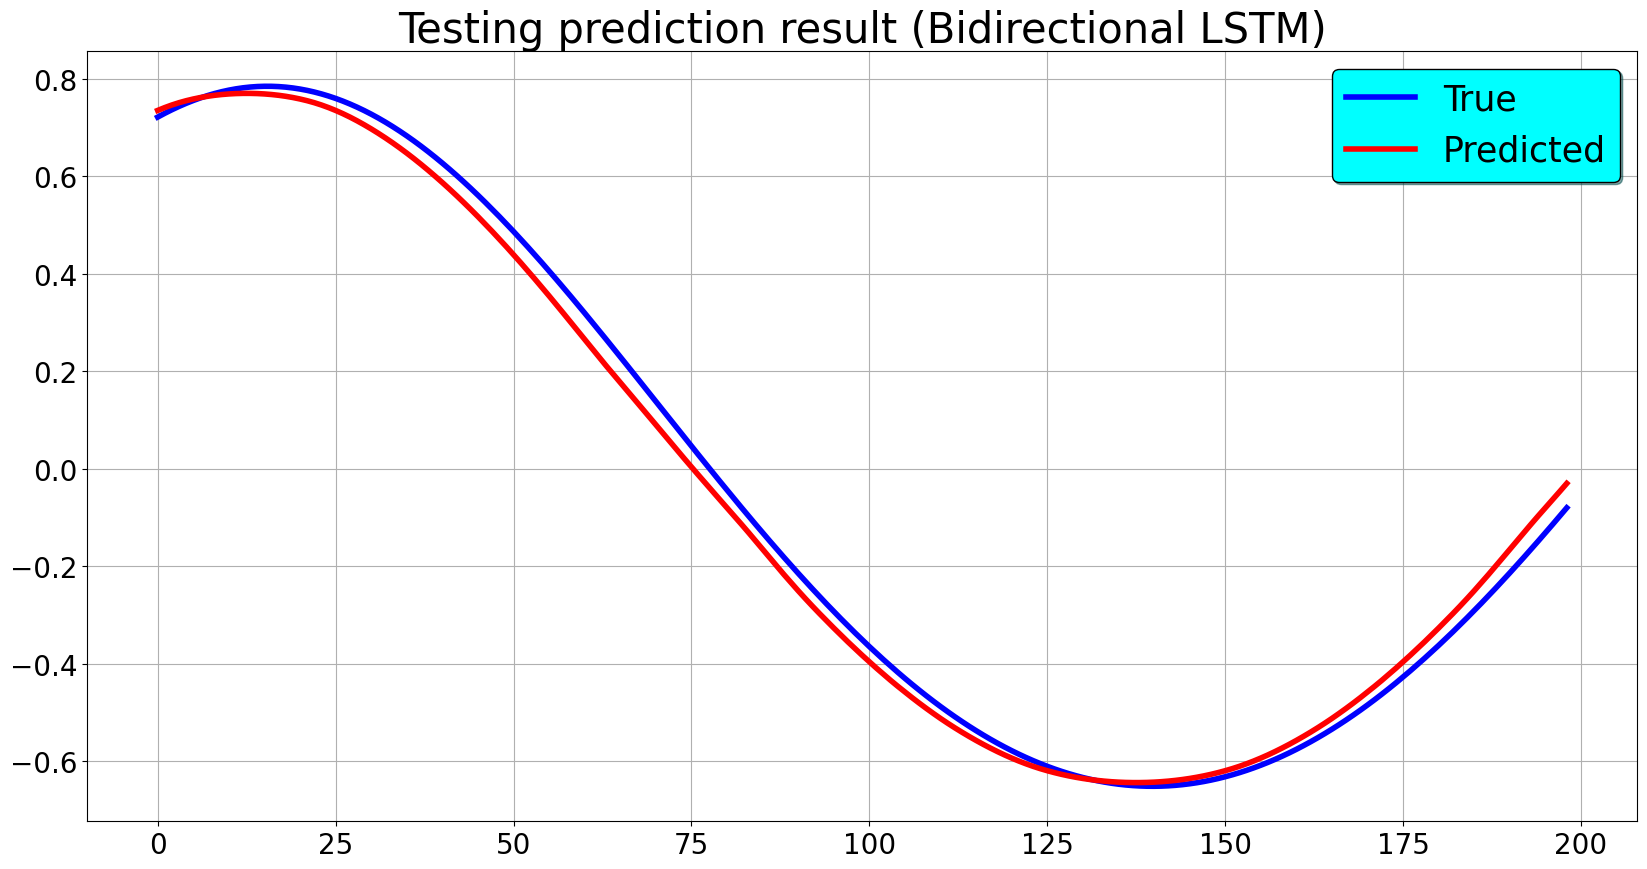

In [ ]:
test_predict_4 = model_3.predict(X_test)
print('RMSE :', np.sqrt(mean_squared_error(y_test, test_predict_4)))

plt.figure(figsize = (20,10))
plt.grid( which='major', axis='both')
plt.title('Testing prediction result (Bidirectional LSTM)', fontsize = 30)
y_test= pd.DataFrame(Y_test)
plt.plot(y_test.index, Y_test,linewidth = 4, label='True', color = 'blue')
plt.plot(y_test.index, test_predict_4, linewidth = 4,color = 'red', label='Predicted')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(fontsize=25,shadow=True,facecolor='cyan', edgecolor = 'k')
plt.show()

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense,Bidirectional,SimpleRNN, GRU,Dropout
import numpy as np
from keras.optimizers import Adam
# Generate some sample data
num_samples = 1000
timesteps = 1
input_dim = 1
model_6 = Sequential()
model_6.add(SimpleRNN(units=128, input_shape = (X_train.shape[1], X_train.shape[2])))
model_6.add(Dropout(0.2))
model_6.add(Dense(units=10))
model_6.add(Dense(units=1))
adamopt = Adam(lr=0.001)
model_6.compile(optimizer = adamopt, loss = 'mse')

# Compile the model
#model_1.compile(loss='mse', optimizer='Adam')

# Train the model
model_6.fit(X_train, Y_train, epochs=100, batch_size=132, validation_split=0.2)
mse = model_6.evaluate(X_test, Y_test, verbose=2)

# Return the fitness value
print('MSE: %.3f' % mse)


Epoch 1/100


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


5/5 [==============================] - 1s 76ms/step - loss: 0.3654 - val_loss: 0.2034
Epoch 2/100
5/5 [==============================] - 0s 16ms/step - loss: 0.1183 - val_loss: 0.0525
Epoch 3/100
5/5 [==============================] - 0s 15ms/step - loss: 0.0275 - val_loss: 0.0082
Epoch 4/100
5/5 [==============================] - 0s 13ms/step - loss: 0.0219 - val_loss: 0.0258
Epoch 5/100
5/5 [==============================] - 0s 16ms/step - loss: 0.0326 - val_loss: 0.0335
Epoch 6/100
5/5 [==============================] - 0s 12ms/step - loss: 0.0273 - val_loss: 0.0172
Epoch 7/100
5/5 [==============================] - 0s 16ms/step - loss: 0.0164 - val_loss: 0.0029
Epoch 8/100
5/5 [==============================] - 0s 12ms/step - loss: 0.0117 - val_loss: 0.0031
Epoch 9/100
5/5 [==============================] - 0s 16ms/step - loss: 0.0128 - val_loss: 0.0061
Epoch 10/100
5/5 [==============================] - 0s 12ms/step - loss: 0.0123 - val_loss: 0.0039
Epoch 11/100
5/5 [=============

7/7 [==============================] - 0s 5ms/step
RMSE : 0.036637928075736806


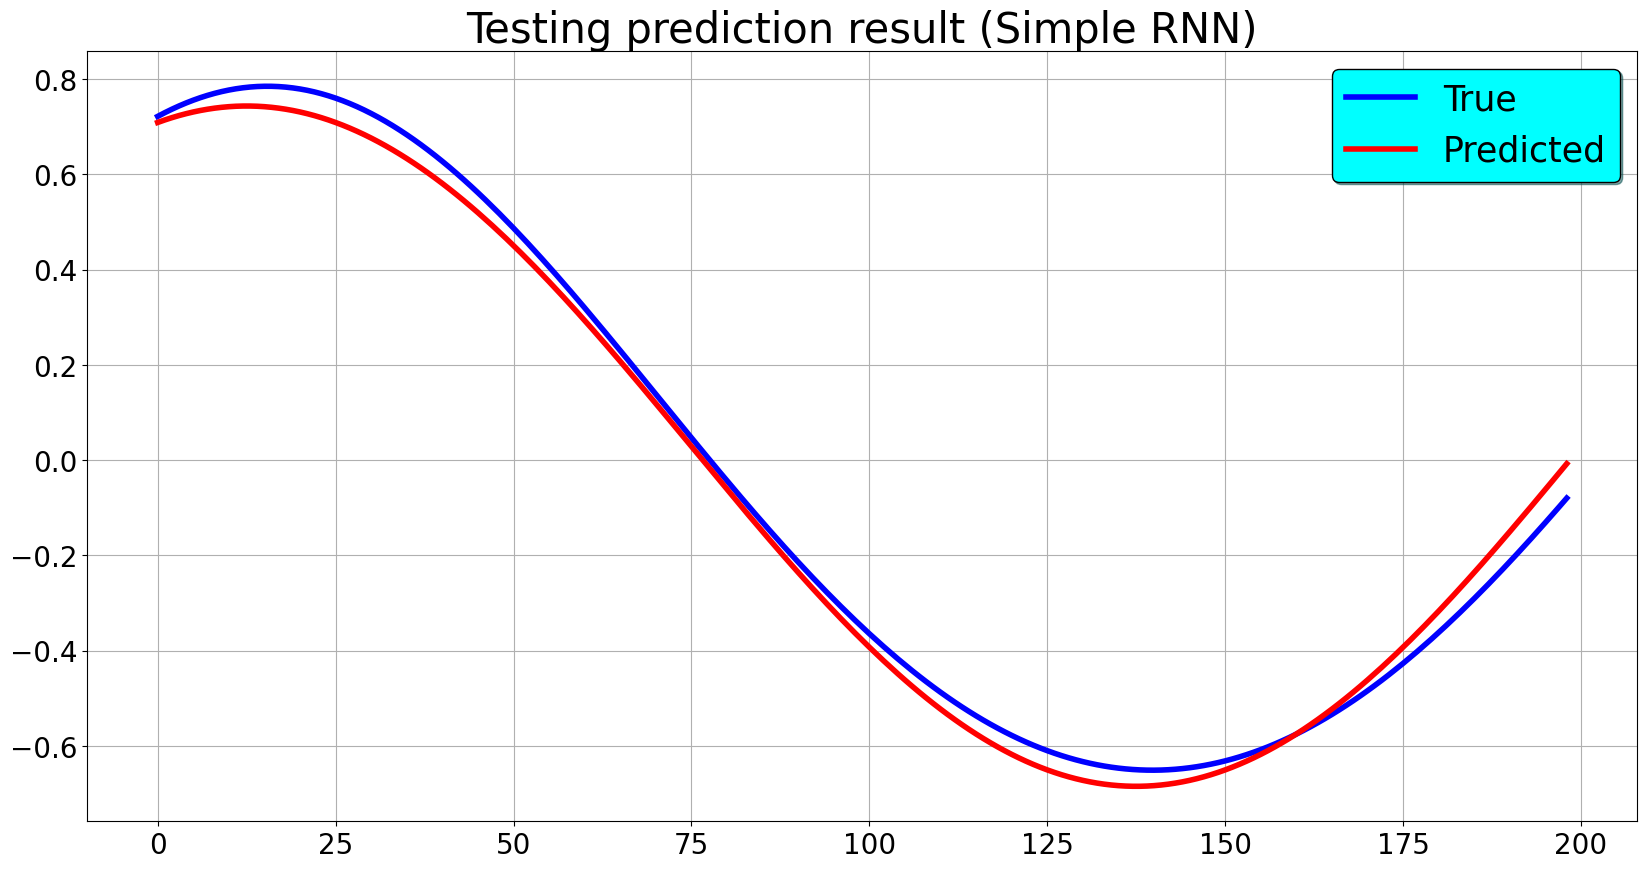

In [ ]:
from sklearn.metrics import mean_squared_error
test_predict_2 = model_6.predict(X_test)
print('RMSE :', np.sqrt(mean_squared_error(Y_test, test_predict_2)))

plt.figure(figsize = (20,10))
plt.grid( which='major', axis='both')
plt.title('Testing prediction result (Simple RNN)', fontsize = 30)
y_test= pd.DataFrame(Y_test)
plt.plot(y_test.index, Y_test,linewidth = 4, label='True', color = 'blue')
plt.plot(y_test.index, test_predict_2, linewidth = 4,color = 'red', label='Predicted')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(fontsize=25,shadow=True,facecolor='cyan', edgecolor = 'k')
plt.show()

In [ ]:
from tensorflow.keras.layers import LSTM, Dropout, Dense, SimpleRNN, GRU, MaxPooling1D, Flatten, Bidirectional, Convolution1D,RepeatVector, TimeDistributed
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense, Conv1D, MaxPooling1D, Flatten

"""X_train = X_train.reshape(800, 1, 1)
model_5 = Sequential()
model_5.add(Convolution1D(filters=256, kernel_size=4, activation='tanh', input_shape=(1, 1)))
model_5.add(Convolution1D(filters=256, kernel_size=4, activation='relu'))
model_5.add(MaxPooling1D(pool_size=2))
model_5.add(Flatten())
model_5.add(RepeatVector(Y_train.shape[1]))"""
 #Define the input shape
input_shape = (X_train.shape[1], X_train.shape[2])

# Create the model
model_5 = Sequential()

# Add a convolutional layer
model_5.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=input_shape))
model_5.add(MaxPooling1D(pool_size=2))
model_5.add(Dropout(0.2))
model_5.add(LSTM(128, activation='relu', return_sequences=True))
model_5.add(TimeDistributed(Dense(100, activation='relu')))
model_5.add(TimeDistributed(Dense(1)))
#model_5.compile(loss='mse', optimizer='adam')
adamopt = Adam(lr=0.001)
model_5.compile(optimizer = adamopt, loss = 'mse')

# Compile the model
#model_1.compile(loss='mse', optimizer='Adam')

# Train the model
model_5.fit(X_train, Y_train, epochs=100, batch_size=132, validation_split=0.2)
mse = model_5.evaluate(X_test, Y_test, verbose=2)

# Return the fitness value
print('MSE: %.3f' % mse)


ValueError: ignored

In [ ]:
from sklearn.metrics import mean_squared_error
test_predict_2 = model_6.predict(X_test)
print('RMSE :', np.sqrt(mean_squared_error(Y_test, test_predict_2)))

plt.figure(figsize = (20,10))
plt.grid( which='major', axis='both')
plt.title('Testing prediction result (Simple RNN)', fontsize = 30)
y_test= pd.DataFrame(Y_test)
plt.plot(y_test.index, Y_test,linewidth = 4, label='True', color = 'blue')
plt.plot(y_test.index, test_predict_2, linewidth = 4,color = 'red', label='Predicted')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(fontsize=25,shadow=True,facecolor='cyan', edgecolor = 'k')
plt.show()

In [ ]:
pip install anfis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 11.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894086 sha256=d029e4af08135b2e1932858e8ebf000bd948a3058edd73b946cd75de40d63405
  Stored in directory: /root/.cache/pip/wheels/32/2c/a1/a90a7d7dd8448ec029f298a61f3490275e99b17aa348be675c
Successfully built scikit-fuzzy


In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, Dense
from anfis import ANFIS
from membership import GaussianMembershipFunction

from keras.optimizers import Adam
# Generate some sample data
num_samples = 100
timesteps = 1
input_dim = 1

def build_anfis_lstm_model(X_train, y_train, num_rules, lstm_units=128):
    """
    Builds and trains the ANFIS-LSTM model.

    Arguments:
    X_train -- numpy array of shape (n_samples, n_timesteps, n_features)
               the training input data
    y_train -- numpy array of shape (n_samples, )
               the training target labels
    num_rules -- int
                 number of ANFIS rules
    lstm_units -- int
                  number of LSTM units (default 128)

    Returns:
    model -- the trained ANFIS-LSTM model
    """
    # build and train the ANFIS model
    mf = [GaussianMembershipFunction(c=0.5, sig=0.1) for i in range(X_train.shape[-1])]
    anfis_model = ANFIS(n_input=X_train.shape[-1], n_memb=num_rules, mf=mf)
    anfis_model.train(X_train.reshape(-1, X_train.shape[-1]), y_train.reshape(-1,))
    
    # predict the membership degrees for the training data
    membership = anfis_model.predict(X_train.reshape(-1, X_train.shape[-1]))
    membership = membership.reshape(X_train.shape[0], X_train.shape[1], num_rules)
    
    # build the LSTM model
    model = Sequential()
    model.add(LSTM(lstm_units, input_shape=(X_train.shape[1], num_rules)))
    model.add(Dense(1))
    
    # compile the model
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    # train the model
    model.fit(membership, y_train, epochs=100, verbose=0)
    
    return anfis_model, model


def evaluate_anfis_lstm_model(X_test, y_test, anfis_model, lstm_model):
    """
    Evaluates the ANFIS-LSTM model on the test data.

    Arguments:
    X_test -- numpy array of shape (n_samples, n_timesteps, n_features)
              the test input data
    y_test -- numpy array of shape (n_samples, )
              the test target labels
    anfis_model -- the trained ANFIS model
    lstm_model -- the trained LSTM model

    Returns:
    rmse -- the root mean squared error on the test data
    """
    # predict the membership degrees for the test data
    membership = anfis_model.predict(X_test.reshape(-1, X_test.shape[-1]))
    membership = membership.reshape(X_test.shape[0], X_test.shape[1], -1)
    
    # predict the target values using the LSTM model
    y_pred = lstm_model.predict(membership).flatten()
    
    # calculate the root mean squared error
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    return rmse


ModuleNotFoundError: ignored

In [ ]:
pip install skfuzzy --no-cache-dir


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement skfuzzy (from versions: none)
ERROR: No matching distribution found for skfuzzy


In [ ]:
import numpy as np
import skfuzzy as fuzz
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
# build the LSTM model

# Generate some sample data
def kernel_fuzzy_cmeans(X_train, num_clusters=3, m=2, kernel_width=20, max_iters=100):
    """
    Applies the kernel fuzzy c-means algorithm to the input data.

    Arguments:
    X_train -- numpy array of shape (n_samples, n_features)
         the input data
    num_clusters -- int
                    number of clusters
    m -- float
         fuzzifier parameter (default 2)
    kernel_width -- float
                    kernel width parameter (default 1)
    max_iters -- int
                 maximum number of iterations for the algorithm (default 100)

    Returns:
    centers -- numpy array of shape (num_clusters, n_features)
               cluster centers
    membership -- numpy array of shape (n_samples, num_clusters)
                  membership values
    """
    # compute the kernel matrix
     # compute the kernel matrix
    K = np.exp(-1/(2*kernel_width**2) * np.sum(X_train[:, np.newaxis, :] - X_train[np.newaxis, :, :], axis=0)**2)
    
    # initialize the membership matrix
    membership = np.random.rand(X_train.shape[0], num_clusters)
    membership = membership / np.sum(membership, axis=1)[:, np.newaxis]
    
    # iterate until convergence or maximum number of iterations is reached
    for i in range(max_iters):
        # compute the cluster centers
        centers = np.dot(membership.T, K) / np.sum(membership, axis=0)[:, np.newaxis]
        
        # compute the distance matrix
        dist = np.sum((K[:, :, np.newaxis] - centers.T[np.newaxis, :, :])**2, axis=1)
        
        # update the membership matrix
        membership_new = 1 / np.sum((dist[:, :, np.newaxis] / dist[:, np.newaxis, :])**(1/(m-1)), axis=1)
        if np.allclose(membership, membership_new):
            break
        print(centers)
       # print(membership.shape)
    
    return centers, membership




def build_kfcm_lstm_model(X_tarin, Y_train, num_clusters, m=2, kernel_width=20, lstm_units=128):
    """
    Builds and compiles the KFCM-LSTM model.

    Arguments:
    X -- numpy array of shape (n_samples, n_timesteps, n_features)
         the input data
    y -- numpy array of shape (n_samples, )
         the target labels
    num_clusters -- int
                    number of clusters
    m -- float
         fuzzifier parameter (default 2)
    kernel_width -- float
                    kernel width parameter (default 1)
    lstm_units -- int
                  number of LSTM units (default 128)

    Returns:
    model -- the compiled KFCM-LSTM model
    """
    # apply KFCM to the input data
    _, membership = kernel_fuzzy_cmeans(X_train.reshape(X_train.shape[0], -1), num_clusters, m=m, kernel_width=kernel_width)
    
    # build the LSTM model
    num_samples = X_train.shape[0]
    timesteps = X_train.shape[1]
    input_dim = 1
    

# Define the LSTM model
    model = Sequential()
    model.add(LSTM(units=132, input_shape=(timesteps, input_dim), activation='tanh', recurrent_activation='sigmoid'))
    model.add(Dense(units=1))

# Compile the model
    model.compile(loss='mse', optimizer='Adam')
    return model





    
model_7 = build_kfcm_lstm_model(X_train, Y_train, num_clusters=3, m=2, kernel_width=20, lstm_units=128)
 # Train the model
model_7.fit(X_train, Y_train, epochs=100, batch_size=32, validation_split=0.2)
mse = model_7.evaluate(X_test, Y_test, verbose=2)
  



# print the model summary
print(model_7.summary())


"""a, b = kernel_fuzzy_cmeans(X_train, num_clusters=3, m=2, kernel_width=1, max_iters=100)

# Print the cluster centers
print('Cluster centers:\n', a)"""
# Return the fitness value
print('MSE: %.3f' % mse)



[[0.0176595 ]
 [0.02358145]
 [0.02421305]]
[[0.0176595 ]
 [0.02358145]
 [0.02421305]]
[[0.0176595 ]
 [0.02358145]
 [0.02421305]]
[[0.0176595 ]
 [0.02358145]
 [0.02421305]]
[[0.0176595 ]
 [0.02358145]
 [0.02421305]]
[[0.0176595 ]
 [0.02358145]
 [0.02421305]]
[[0.0176595 ]
 [0.02358145]
 [0.02421305]]
[[0.0176595 ]
 [0.02358145]
 [0.02421305]]
[[0.0176595 ]
 [0.02358145]
 [0.02421305]]
[[0.0176595 ]
 [0.02358145]
 [0.02421305]]
[[0.0176595 ]
 [0.02358145]
 [0.02421305]]
[[0.0176595 ]
 [0.02358145]
 [0.02421305]]
[[0.0176595 ]
 [0.02358145]
 [0.02421305]]
[[0.0176595 ]
 [0.02358145]
 [0.02421305]]
[[0.0176595 ]
 [0.02358145]
 [0.02421305]]
[[0.0176595 ]
 [0.02358145]
 [0.02421305]]
[[0.0176595 ]
 [0.02358145]
 [0.02421305]]
[[0.0176595 ]
 [0.02358145]
 [0.02421305]]
[[0.0176595 ]
 [0.02358145]
 [0.02421305]]
[[0.0176595 ]
 [0.02358145]
 [0.02421305]]
[[0.0176595 ]
 [0.02358145]
 [0.02421305]]
[[0.0176595 ]
 [0.02358145]
 [0.02421305]]
[[0.0176595 ]
 [0.02358145]
 [0.02421305]]
[[0.0176595

7/7 [==============================] - 0s 3ms/step
RMSE : 0.029107536344923215


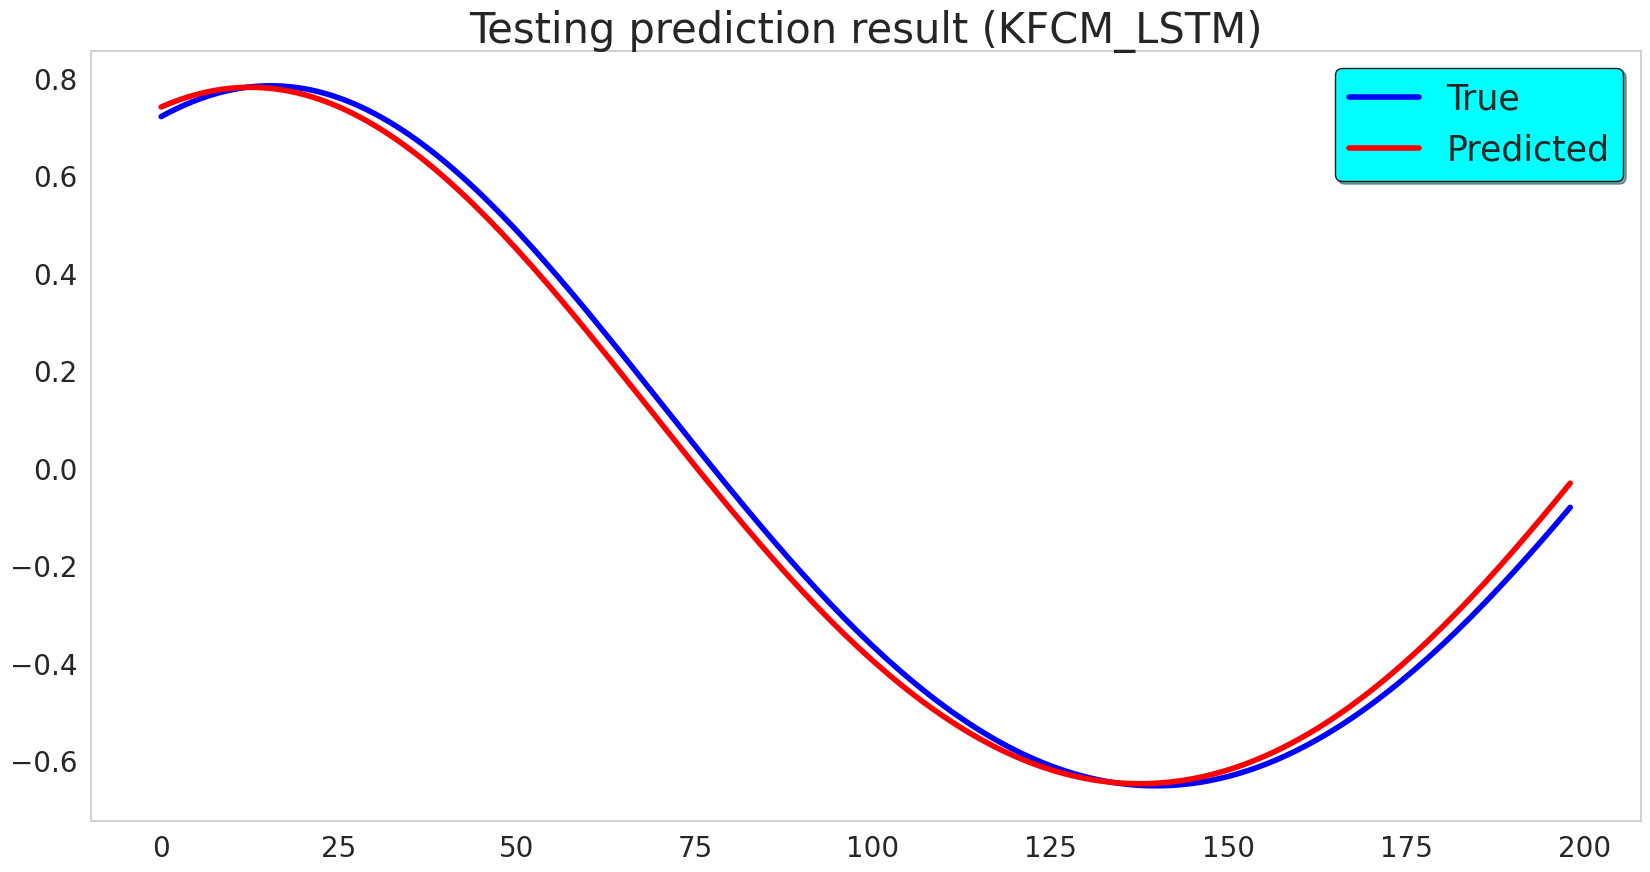

In [ ]:
from sklearn.metrics import mean_squared_error
test_predict_2 = model_7.predict(X_test)
print('RMSE :', np.sqrt(mean_squared_error(Y_test, test_predict_2)))

plt.figure(figsize = (20,10))
plt.grid( which='major', axis='both')
plt.title('Testing prediction result (KFCM_LSTM)', fontsize = 30)
y_test= pd.DataFrame(Y_test)
plt.plot(y_test.index, Y_test,linewidth = 4, label='True', color = 'blue')
plt.plot(y_test.index, test_predict_2, linewidth = 4,color = 'red', label='Predicted')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(fontsize=25,shadow=True,facecolor='cyan', edgecolor = 'k')
plt.show()

In [ ]:
import numpy as np
import skfuzzy as fuzz
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

def fuzzy_cmeans(X_train, num_clusters=3, m=2, max_iters=100):
    """
    Applies the fuzzy c-means algorithm to the input data.

    Arguments:
    X_train -- numpy array of shape (n_samples, n_features)
         the input data
    num_clusters -- int
                    number of clusters
    m -- float
         fuzzifier parameter (default 2)
    max_iters -- int
                 maximum number of iterations for the algorithm (default 100)

    Returns:
    centers -- numpy array of shape (num_clusters, n_features)
               cluster centers
    membership -- numpy array of shape (n_samples, num_clusters)
                  membership values
    """
    # initialize the membership matrix
    membership = np.random.rand(X_train.shape[0], num_clusters)
    membership = membership / np.sum(membership, axis=1)[:, np.newaxis]
    
    # iterate until convergence or maximum number of iterations is reached
    for i in range(max_iters):
        # compute the cluster centers
        centers = np.dot(membership.T, X_train) / np.sum(membership, axis=0)[:, np.newaxis]
        
        # compute the distance matrix
        dist = np.sum((X_train[:, :, np.newaxis] - centers.T[np.newaxis, :, :])**2, axis=1)
        
        # update the membership matrix
        membership_new = 1 / np.sum((dist[:, :, np.newaxis] / dist[:, np.newaxis, :])**(1/(m-1)), axis=1)
        if np.allclose(membership, membership_new):
            break
        membership = membership_new
        print(centers)
        
    return centers, membership

def build_fcm_lstm_model(X_train, Y_train, num_clusters, m=2, lstm_units=128):
    """
    Builds and compiles the FCM-LSTM model.

    Arguments:
    X -- numpy array of shape (n_samples, n_timesteps, n_features)
         the input data
    y -- numpy array of shape (n_samples, )
         the target labels
    num_clusters -- int
                    number of clusters
    m -- float
         fuzzifier parameter (default 2)
    lstm_units -- int
                  number of LSTM units (default 128)

    Returns:
    model -- the compiled FCM-LSTM model
    """
    # apply FCM to the input data
    _, membership = fuzzy_cmeans(X_train.reshape(X_train.shape[0], -1), num_clusters, m=m)
    
    # build the LSTM model
    num_samples = X_train.shape[0]
    timesteps = X_train.shape[1]
    input_dim = 1

    # Define the LSTM model
    model = Sequential()
    model.add(LSTM(units=lstm_units, input_shape=(timesteps, input_dim), activation='tanh', recurrent_activation='sigmoid'))
    model.add(Dense(units=1))

    # Compile the model
    model.compile(loss='mse', optimizer='Adam')
    return model

model_8 = build_fcm_lstm_model(X_train, Y_train, num_clusters=3, m=2, lstm_units=128)




# Train the model
model_8.fit(X_train, Y_train, epochs=100, batch_size=32, validation_split=0.2)
mse = model_8.evaluate(X_test, Y_test, verbose=2)

# Return the fitness value
print('MSE: %.3f' % mse)
#print(model.layers[0].trainable_weights)


[[0.03119245]
 [0.02524138]
 [0.04516443]]
[[0.0391149 ]
 [0.05088494]
 [0.01150088]]
[[0.023176  ]
 [0.00014654]
 [0.07680071]]
[[ 0.05388695]
 [ 0.09714249]
 [-0.04879005]]
[[-0.0063306 ]
 [-0.08593216]
 [ 0.17824338]]
[[ 0.10129458]
 [ 0.22984857]
 [-0.2160211 ]]
[[-0.09501191]
 [-0.28517777]
 [ 0.37896461]]
[[ 0.21448196]
 [ 0.42436189]
 [-0.43852545]]
[[-0.26461281]
 [-0.45550015]
 [ 0.52805752]]
[[ 0.39007703]
 [ 0.50533239]
 [-0.54152089]]
[[-0.43795456]
 [-0.49285523]
 [ 0.57880132]]
[[ 0.4981636 ]
 [ 0.5159358 ]
 [-0.57838275]]
[[-0.49409811]
 [-0.49940447]
 [ 0.5963438 ]]
[[ 0.51768037]
 [ 0.51901707]
 [-0.58801592]]
[[-0.50130942]
 [-0.50166724]
 [ 0.59934005]]
[[ 0.5197966 ]
 [ 0.51988304]
 [-0.58939932]]
[[-0.50209282]
 [-0.50211562]
 [ 0.59972123]]
[[ 0.52002523]
 [ 0.52003071]
 [-0.58957835]]
[[-0.50218191]
 [-0.50218335]
 [ 0.59976892]]
[[ 0.52005152]
 [ 0.52005186]
 [-0.58960118]]
[[-0.50219253]
 [-0.50219262]
 [ 0.59977492]]
[[ 0.52005467]
 [ 0.5200547 ]
 [-0.58960407

7/7 [==============================] - 0s 3ms/step
RMSE : 0.02971095295557945


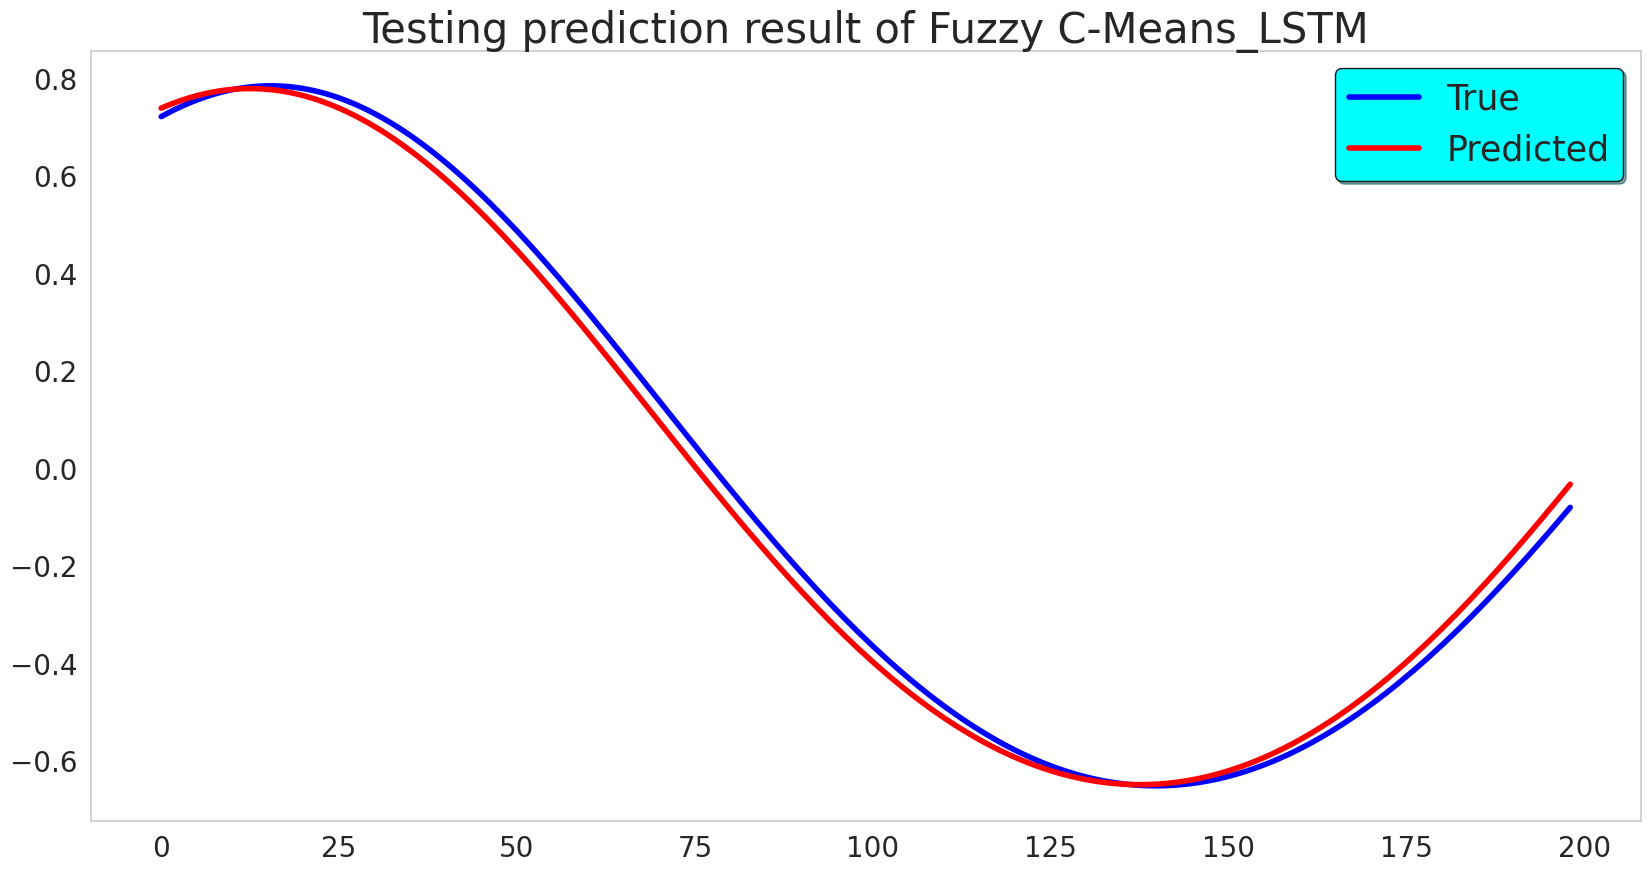

In [ ]:
from sklearn.metrics import mean_squared_error
test_predict_2 = model_8.predict(X_test)
print('RMSE :', np.sqrt(mean_squared_error(Y_test, test_predict_2)))

plt.figure(figsize = (20,10))
plt.grid( which='major', axis='both')
plt.title('Testing prediction result of Fuzzy C-Means_LSTM', fontsize = 30)
y_test= pd.DataFrame(Y_test)
plt.plot(y_test.index, Y_test,linewidth = 4, label='True', color = 'blue')
plt.plot(y_test.index, test_predict_2, linewidth = 4,color = 'red', label='Predicted')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(fontsize=25,shadow=True,facecolor='cyan', edgecolor = 'k')
plt.show()

In [ ]:
from keras.models import Model
from keras.layers import Input, Dense, LSTM, SimpleRNN

# Define the input shape
input_shape = (timesteps, features)

# Define the Jordan RNN layer
jordan_rnn = SimpleRNN(units=32, activation='tanh', return_sequences=True)

# Define the LSTM layer
lstm = LSTM(units=64, activation='tanh', return_sequences=False)

# Define the input layer
inputs = Input(shape=input_shape)

# Connect the input layer to the Jordan RNN layer
jordan_rnn_output = jordan_rnn(inputs)

# Connect the Jordan RNN layer to the LSTM layer
lstm_output = lstm(jordan_rnn_output)

# Define the output layer
outputs = Dense(units=num_classes, activation='softmax')(lstm_output)

# Define the model
model = Model(inputs=inputs, outputs=outputs)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, SimpleRNN, Bidirectional

# Define the model architecture
model = Sequential()
model.add(Bidirectional(SimpleRNN(32, activation='tanh', return_sequences=True), input_shape=(timesteps, input_dim)))
model.add(LSTM(64, activation='tanh', return_sequences=True))
model.add(Dense(1))

# Compile the model
model.compile(loss='mse', optimizer='adam')

# Train the model
model.fit(X_train, Y_train, epochs=50, batch_size=32, validation_split=0.2)
